# Исследование  данных о продаже компьютерных игр

В рамках исследования рассмотрены исторические данные интернет-магазина «Стримчик» о продажах игр, оценках пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

#### Цель исследования: 
Выявить определяющие успешность игры закономерности для прогнозирования популярности продукта и планирования рекламных кампаний.

#### План работ:
* Изучить общую информацию о выгрузке данных
* Провести предобработку данных - обработать типы данных, пропуски, дубликаты, добавить новые столбцы, найти выбросы
* Провести исследовательский анализ данных - исследовать периоды продаж, платформы, жанры, влияние рейтинга на продажи 
* Составить портрет пользвателя каждого региона (Северная Америка, Европа, Япония). Определить любимые платформы, жанры, и определить зависимость продаж от рейтинга
* Проверка гипотез об одинаковости/различиях средних пользовательских рейтингов для платформ Xbox One и PC, жанров Action и Sport

#### Загрузка библиотек

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Изучение общей информации

План: загрузить таблицу, вывести общую информацию о данных таблицы, вывести гистограммы по каждому столбцу для получения представления о данных

#### Загрузка таблицы и вывод первых строк на экран

In [74]:
data = pd.read_csv('04_games.csv')
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изучение общей информации

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изучение основных статистик данных

In [76]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


#### Изучение данных численных столбцов с помощью диаграмм

##### Вывод графика количества игр по году релиза

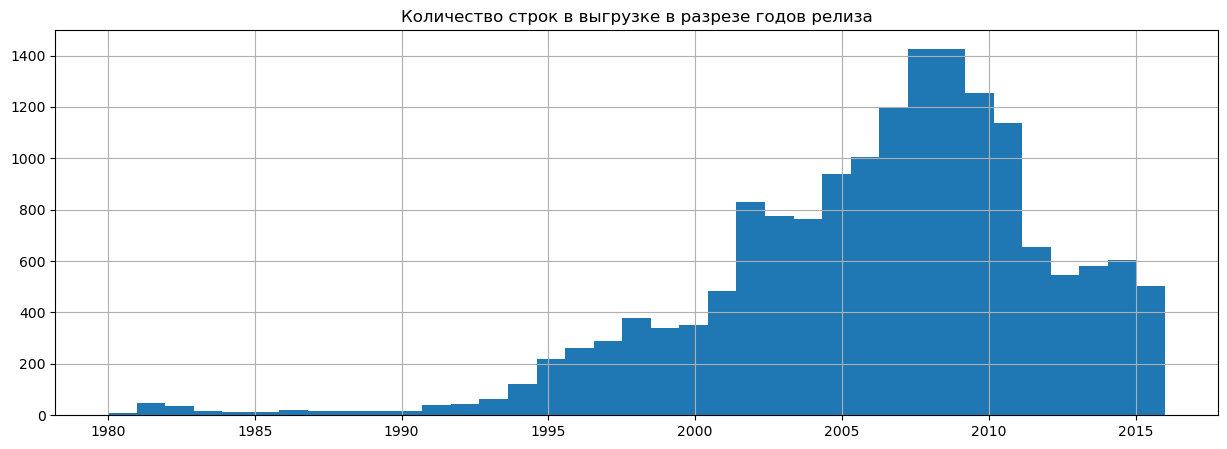

In [77]:
data['Year_of_Release'].hist(bins = 37, figsize = (15, 5))
plt.title('Количество строк в выгрузке в разрезе годов релиза');

##### Вывод графика по продажам в разных регионах

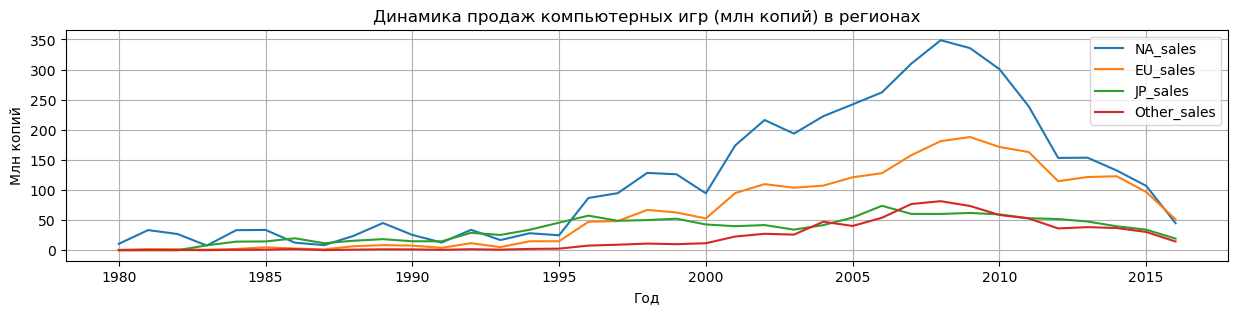

In [78]:
sales_data = data.groupby('Year_of_Release')[['NA_sales','EU_sales','JP_sales','Other_sales']].agg('sum').reset_index()

fig, ax = plt.subplots()

x = sales_data['Year_of_Release']
y1 = sales_data['NA_sales']
y2 = sales_data['EU_sales']
y3 = sales_data['JP_sales']
y4 = sales_data['Other_sales']

ax.plot(x, y1, label = 'NA_sales')
ax.plot(x, y2, label = 'EU_sales')
ax.plot(x, y3, label = 'JP_sales')
ax.plot(x, y4, label = 'Other_sales')

ax.set_title('Динамика продаж компьютерных игр (млн копий) в регионах')
ax.set_xlabel('Год')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(3)

plt.show();

##### Вывод данных по медианному рейтингу по годам релиза

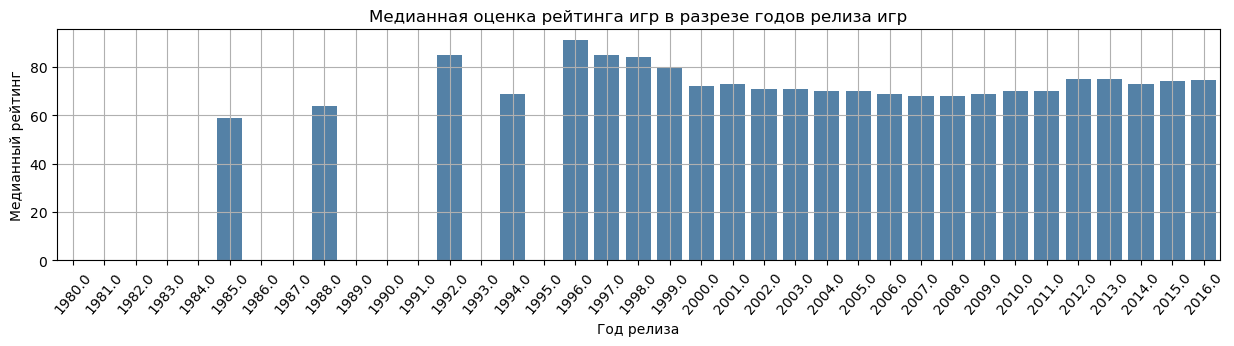

In [79]:
critic_scores_by_years = data.groupby('Year_of_Release')['Critic_Score'].agg('median').reset_index()

fig, ax = plt.subplots()

sns.barplot(x=critic_scores_by_years['Year_of_Release'], y=critic_scores_by_years['Critic_Score'], palette=['steelblue'])
ax.set_title('Медианная оценка рейтинга игр в разрезе годов релиза игр')
ax.set_xlabel('Год релиза')
ax.set_ylabel('Медианный рейтинг')
plt.grid()
plt.xticks(rotation=50)
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()

**Вывод:**

В таблице содержится 11 столбцов и 16715 записей.
Предварительные выводы о содержании столбцов:
1. Name - Наименование игры. Содержит текст с названием. Содержит 2 строки с пустым названием - нужно проверить столбец на предмет ошибки
2. Platform - Платформа, на которой запускется игра. Содержит текст, и не содержит пустых значений 
3. Year_of_Release - Год выпуска игры, от 1980 по 2016 год. Содержит значения float64, хотя содержит целочисленное значение года (нужно исправить). Содежит пустые значения, которые нужно проверить. 
4. Genre - Жанр игры. Содержит текстовое значение. Содержит 2 строки с пустым названием - нужно проверить столбец на предмет ошибки.
5. NA_sales - Продажи компьютерных игр в Северной Америке в миллионах проданных копий. Содержит численные значения формата float64 (корректно), и не содержит пустых значений
6. EU_sales - Продажи компьютерных игр в Европе в миллионах проданных копий. Содержит численные значения формата float64 (корректно), и не содержит пустых значений
7. JP_sales - Продажи компьютерных игр в Северной Америке в миллионах проданных копий. Содержит численные значения формата float64 (корректно), и не содержит пустых значений
8. Other_sales - Продажи компьютерных игр в других странах в миллионах проданных копий. Содержит численные значения формата float64 (корректно), и не содержит пустых значений
9. Critic_Score - Оценка критиков (максимум 100). Содержит численные значения формата float64, хотя предположительно содержит только целочисленные значения (исправить нельзя, т.к. есть пустые значения). Более чем в половине строк данные отсутствуют, но исправлять их не требуется, так как значения столбца состоят из индивидуальных оценок, проведенных профессионалами, и при заполнении пропусков ориентироваться на средние/медианные значения нельзя.  
10. User_Score - Оценка пользователей (максимум 10). Содержит численные значения в формате числа с десятичной дробью, но при этом отражается в формате object (необходимо исправить). Содержит примерно 38% пустых значений, но исправлять их не требуется (по тем же причинам, что и п.9)
11. Rating - рейтинг от организации ESRB (возрастная категория). Содержит текстовые значения рейтинга и содержит примерно 38% пустых значений.

В выгрузке содержится не так много данных за период до 1995 года - игр выпускалось менее 200 в год, продажи по каждому региону не превышали 50 млн копий. Рейтинги критиков до 1995 года также появляются в выгрузке редко.

Также известно, что данные за 2016 год могут быть неполными (2016 год - последний в выборке, и данные по нему могли выгрузить не до конца года)

### Предобработка данных

#### Замена названий столбцов (приведение к нижнему регистру)

In [80]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков в данных

,space
name,2
genre,2
year_of_release,269
user_score,6701
rating,6766
critic_score,8578


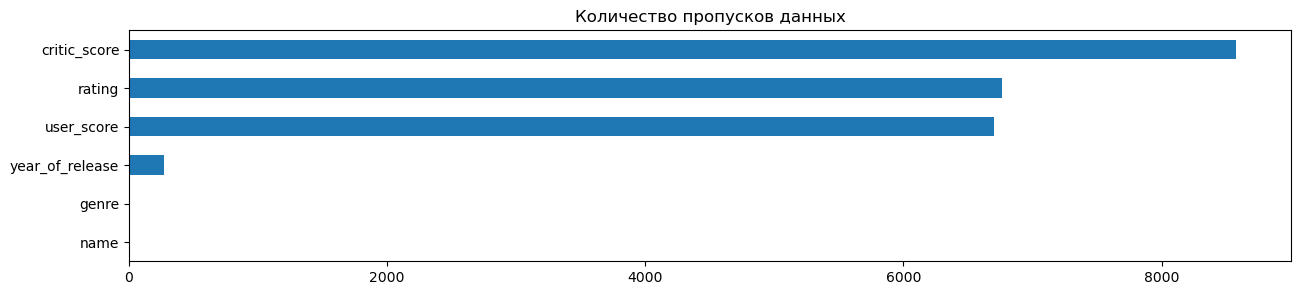

In [81]:
#Вывод количества пропущенных значений
try:
    empty_data = (
                  data.isna()
                      .sum()
                      .to_frame()
                      .rename(columns = {0:'space'})
                      .query('space > 0')
                      .sort_values(by = 'space', ascending = True)
                 )

    display(empty_data)
    empty_data.plot(kind = 'barh', figsize = (15,3), legend = False).set_title('Количество пропусков данных')   
    plt.show()
except:
    print('Столбцов с пустыми значениями больше не осталось')

**Вывод:**

* Пустые значения в столбцах critic_score и user_score не следует заполнять. Это индивидуальные субъективные оценки, проведенные профессионалами. Т.о., пустые значения нельзя заполнять средними/медианными значениями, но и 0 тоже заполнять нельзя, иначе 0 может исказить рассчитываемые в дальнейшем статистики
* Значения rating являются категориальными, поэтому заполним пропуски значением "Unknown"
* Данные без year_of_release следует удалить, т.к. мы не можем подставить пустые значения в качестве средней (все-таки качество и жанр компьютерной игры привязаны ко времени - определенные жанры могут выходить из популярности). При этом, в ходе исследовательского анализа данных эти строки будут пропадать, если мы будем строить диаграммы по годам выпуска, но будут появляться, если в диаграмме год не используется. Таким образом, эти строки искажают статистику выгрузки. Но для начала проверим содержание этих строк.
* В столбцах name и genre содержится по 2 пустых значения - стоит посмотреть эти строки подробнее

##### Заполнение строк с пустым rating

In [82]:
data.loc[data['rating'].isna() == True, 'rating'] = 'Unknown'
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


**Вывод:**

Произведена успешная замена пустых значений rating на Unknown

##### Исследование строк с пустым year_of_release

In [83]:
#Проверим, нет ли такого, что для одной и той же игры на одной и той же платформе
#в одной строке проставлен год выпуска игры, а в другой - нет.
#Создадим dataframe наименований игр, у которых в year_of_release проставлено пусто
empty_year_df = (
                 data
                 .loc[data['year_of_release'].isna() == True, ['name','platform']]
                 .drop_duplicates()
                 .reset_index(drop = True)
                )
#Создадим dataframe наименований игр, у которых в year_of_release проставлено какое-то значение
full_year_df = (
                 data
                 .loc[data['year_of_release'].isna() == False, ['name','platform']]
                 .drop_duplicates()
                 .reset_index(drop = True)
                )
#Объединим таблицы через inner join
games_with_mistakes = empty_year_df.merge(full_year_df, on = ['name','platform'])

#Покажем совпадения
display(games_with_mistakes.head(10))

#Выведем строки data, в которых указана игра Sonic the Hedgehog 
display(data[(data['name'] == 'Sonic the Hedgehog') & (data['platform'] == 'PS3')])

,name,platform
0,Sonic the Hedgehog,PS3


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


**Вывод:**

Игра Sonic the Hedgehog	почему-то задублировалась в выгрузке. Это могло произойти при объединении данных из разных источников или по причине конфликта в алгоритме выгрузки, когда алгоритм увидел повторяющееся значение name и platform.

Исследуем вопрос: https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%B3%D1%80_%D1%81%D0%B5%D1%80%D0%B8%D0%B8_Sonic_the_Hedgehog

Игра с одним и тем же названием выходила на PS3 в 2006 году и 2011 году. Но точно убедиться в том, что перед нами с NaN в year_of_release мы не можем. Википедия утверждает, что продажи Sonic the Hedgehog 2011 года были и в Северной Америке, и в Европе, и в Японии, но мы почему-то видим только данные по продажам в Европе (хотя данные могли отсечься при округлении до млн проданных копий). Так как для замены year_of_release на 2011 доказательств недостаточно, удалим вносящую неопределенность строку. Удаляемые данные по объему продаж игры в Европе не нанесут существенного ущерба общей сумме продаж всех игр в Европе.

Удаление будем произведено в конце данного пункта после обработки других исключений.

In [84]:
#Проверим наименования игр с пустым year_of_release
print(pd.Series(data.loc[data['year_of_release'].isna() == True, 'name'].unique()).sort_values().tolist())

['AKB1/48: Idol to Guam de Koishitara...', 'Action Man-Operation Extreme', 'Advance Wars: Days of Ruin', 'Adventure', 'Agarest Senki: Re-appearance', 'Air-Sea Battle', 'Alex Rider: Stormbreaker', 'All-Star Baseball 2005', 'Alone in the Dark: The New Nightmare', 'Aquaman: Battle for Atlantis', 'Atsumare! Power Pro Kun no DS Koushien', 'B.L.U.E.: Legend of Water', 'Backbreaker', 'Battle vs. Chess', 'Bejeweled 3', 'Beyond the Labyrinth', 'Big Beach Sports 2', 'Bikkuriman Daijiten', 'BioShock 2', 'Breakaway IV', 'Brothers in Arms: Furious 4', 'Build-A-Bear Workshop: Friendship Valley', "Cabela's Alaskan Adventure", 'Call of Duty 3', 'Call of Duty: Black Ops', 'Captain America: Super Soldier', 'Charm Girls Club: My Fashion Mall', 'Charm Girls Club: My Fashion Show', 'Chou Soujuu Mecha MG', 'Circus Atari', 'Clockwork Empires', 'College Hoops 2K6', 'Combat', 'Combat Elite: WWII Paratroopers', 'Combat Wings: The Great Battles of WWII', "Cubix Robots for Everyone: Clash 'n' Bash", 'Custom Robo'

**Вывод:**

Названия некоторых игр содержат номер года в виде четырех цифр или двух цифр. Можно вытащить номер года таких игр из их названия и вставить в year_of_release.
Данные по остальным играм можно удалить по причинам, объясненным в предыдущем выводе.
Данные пропуски могли возникнуть при неправильном алгоритме выгрузки, конфликтующих данных, в связи с человеческим фактором, либо пропуски могут быть связанны с иными причинами. 

(276 пропусков - в реальной работе это не так уж и много, и можно было бы попробовать дозаполнить оставшиеся пропуски вручную, но в рамках данного проекта я поправлю только значения year_of_release для тех игр, у которых в названии есть номер года)

In [85]:
#Заполнение данных year_of_release данными по году выпуска в формате 4х цифр, указанному в названии игры
games_with_replaced_year = []

for year in range(1980, 2017): #2017):
    for name in data.loc[data['year_of_release'].isna() == True, 'name'].unique():
        if str(year) in name:
            data.loc[(data['year_of_release'].isna() == True) & (data['name'] == name) , 'year_of_release'] = year
            games_with_replaced_year.append(name)
            
print('Замена year_of_release осуществлена в строках с названиями игр:', games_with_replaced_year)

Замена year_of_release осуществлена в строках с названиями игр: ['Madden NFL 2002', 'NASCAR Thunder 2003', 'NFL GameDay 2003', 'NBA Live 2003', 'Madden NFL 2004', 'FIFA Soccer 2004', 'All-Star Baseball 2005', 'wwe Smackdown vs. Raw 2006', 'Sega Rally 2006', 'Football Manager 2007', 'PDC World Championship Darts 2008', 'PES 2009: Pro Evolution Soccer', 'Tour de France 2011', 'Tomb Raider (2013)']


In [86]:
#В выборке также замечены строки, где год обозначен двумя числами
#Найдем такие игры через цикл, но замену значений проведем вручную, 
#т.к. например, есть игры с названием "Famista 64", где 64 - не год 
games_with_two_numbers_in_name = []

for name in data.loc[data['year_of_release'].isna() == True, 'name'].unique():
    counter = 0
    
    for element in name:
        try:
            if int(element) in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
                counter += 1
        except:
            continue
    
    if counter == 2:
        games_with_two_numbers_in_name.append(name)

print('Игры с двумя числами в наименовании: ', games_with_two_numbers_in_name)

Игры с двумя числами в наименовании:  ['Triple Play 99', 'LEGO Harry Potter: Years 5-7', 'Madden NFL 07', 'Madden NFL 11', 'Madden NFL 06', 'Tiger Woods PGA Tour 07', 'College Hoops 2K6', 'Jet X20', 'Famista 64', 'Major League Baseball 2K6', 'Drake of the 99 Dragons', 'Major League Baseball 2K8']


In [87]:
#Проставим номер года для игр, у которых номер года в формате двух чисел попадает в диапазон 1980-2016:
data.loc[(data['name'] == 'Triple Play 99') & (data['year_of_release'].isna() == True), 'year_of_release'] = 1999
data.loc[(data['name'] == 'Madden NFL 07')  & (data['year_of_release'].isna() == True), 'year_of_release'] = 2007
data.loc[(data['name'] == 'Madden NFL 11')  & (data['year_of_release'].isna() == True), 'year_of_release'] = 2011
data.loc[(data['name'] == 'Madden NFL 06')  & (data['year_of_release'].isna() == True), 'year_of_release'] = 2006
data.loc[(data['name'] == 'MLB SlugFest 20-03') & (data['year_of_release'].isna() == True), 'year_of_release'] = 2003
data.loc[(data['name'] == 'Tiger Woods PGA Tour 07') & (data['year_of_release'].isna() == True), 'year_of_release'] = 2007

In [88]:
#Удалим оставшиеся строки с пустым year_of_release
data = data[data['year_of_release'].isna() == False]

**Вывод:**

Мы заменили пустые значения номера года на год, указанный в названии, и удалили пустые строки без года. Возможно, это не совсем точный результат - например, Madden NFL 07 могла выйти не в 2007 году, а, например, 2008. Но промах будет не такой сильный.

##### Исследование строк с пустыми значениями name и genre

In [89]:
display(data[(data['name'].isna()) | (data['genre'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown


**Вывод:**

Данные сроки не дают нам никакой информации для дальнейшего анализа. Цель  - определить показатели, по которым можно прогнозировать популярность игры. В данном случае у нас нет ни данных по рейтингам, ни данных по году, ни по жанру. Доля продаж копий данных игр в общем объеме продаж несущественна. Поэтому удаляем эти строки.
Предположительно подобные строки могут появиться в связи с удалением игры из базы данных интернет-магазина.

In [90]:
data = data[(data['name'].isna() == False) & (data['genre'].isna() == False)]

#### Преобразование типов данных

##### Вывод типов данных

In [91]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Вывод:**

Необходимо поменять типы столбцов:
* year_of_release - т.к. содержит целочисленное значение года. Столбец также содержит пустые значения, поэтому сначала придется убрать строки с пустым year_of_release. Весь период с 1980 по 2016 не понадобится нам в дальнейшем для анализа, и мы в дальнейшем обрежем выгрузку. Т.о., если мы оставим пустые значения year_of_release, то может получиться так, что они на самом деле будут относиться к удаленному ранее периоду, и поэтому исказят результаты исследования.
* user_score - т.к. содержит число с десятичной дробью, означающее рейтинг (от 0 до 10). Не должно содержать текстовых значений

Типы каких столбцов не меняются:
* name, platform, genre, rating - данные столбцы содержат текстовые значения, поэтому тип столбца object корректен
* na_sales, eu_sales, jp_sales, other_sales - данные столбцы содержат численные значения млн проданных копий (число с десятичной дробью), поэтому тип float64 корректен
* critic_score - содержит целочисленное значение рейтинга (т.е., можно было бы поменять тип на int), но столбец содержит пустые значения, а int не хранит пустые значения, поэтому оставляем тип float64. Замена пустых значений на 0 была бы некорректна (об этом в следующем подразделе)

##### Проверка уникальных значений year_of_release и user_score перед заменой типа столбца

In [92]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [93]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [94]:
#Сколько процентов от выгрузки занимают значения tbd?
print((data.loc[data['user_score'] == 'tbd', 'user_score'].count() / data['user_score'].count()).round(4))

0.2413


**Вывод**:

Столбец year_of_release действительно содержит только целочисленное значение года, поэтому заменяем значения на int.
А столбец user_score содержит не только числовые значения (или пустые), но и значения с пометкой "tbd". Причем значения "tbd" составляют не менее 24% от всей совокупности.

*tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.*

Так как значение "tbd" не дает нам никакой информации о реакции пользователей, то решено заменить его на nan, после чего тип данных в столбце user_score будет заменен на float64.

##### Замена типа столбца year_of_release и проверка замены типа столбца

In [95]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].dtypes

dtype('int32')

**Вывод:**
Произведена замена типа столбца year_of_release на int64

##### Обработка столбца user_score и проверка замены типа столбца

In [96]:
#Замена значений с tbd на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

#Обновление типа столбца user_score
data['user_score'] = data['user_score'].astype('float64')
data['user_score'].dtypes

dtype('float64')

**Вывод:**
Произведена замена типа столбца user_score на float64

#### Поиск дубликатов данных

##### Поиск явных дубликатов данных

In [97]:
#Поиск полных дубликатов строк
data.duplicated().sum()

0

**Вывод:**
Полных дубликатов строк не выявлено

##### Поиск неявных дубликатов данных

In [98]:
#Поиск одинаковых значений с разным написанием в столбце name 

#Создадим новую таблицу с наименованием игры в нижнем регистре
name_in_caps = data[['name', 'platform', 'year_of_release']].copy()
name_in_caps['name'] = name_in_caps['name'].str.lower()

#Найдем количество дубликатов в этой таблице
print(
      'Количество одних и тех же игр с разным написанием:', 
      name_in_caps.loc[name_in_caps.duplicated(), 'name'].count()
     )

#Выведем эти игры на экран
display(name_in_caps[name_in_caps.duplicated()])

#Выведем строки с дубликатами в data на экран
display(data[(data['name'].str.lower() == 'madden nfl 13') & (data['platform'] == 'PS3')])

Количество одних и тех же игр с разным написанием: 1


,name,platform,year_of_release
16230,madden nfl 13,PS3,2012


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


**Вывод:**

Найдена одна повторяющаяся игра. Единственные различия - в сумме продаж. Поэтому сохраним суммы продаж в отдельных переменных, и удалим дублирующуюся строку

In [99]:
#Сохраняем данные о продажах в переменные
na_sales = (
            data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012')
            ['na_sales'].sum()
           )
eu_sales = (
            data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012')
            ['eu_sales'].sum()
           )
jp_sales = (
            data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012')
            ['jp_sales'].sum()
           )
other_sales = (
            data.query('name == "Madden NFL 13" and platform == "PS3" and year_of_release == 2012')
            ['other_sales'].sum()
           )

#Меняем сумму на сумму двух строк
data.loc[(
          (data['name'] == 'Madden NFL 13') & 
          (data['platform'] == 'PS3') &
          (data['year_of_release'] == '2012')
         )
         ,'na_sales'] = na_sales

data.loc[(
          (data['name'] == 'Madden NFL 13') & 
          (data['platform'] == 'PS3') &
          (data['year_of_release'] == '2012')
         )
         ,'eu_sales'] = eu_sales

data.loc[(
          (data['name'] == 'Madden NFL 13') & 
          (data['platform'] == 'PS3') &
          (data['year_of_release'] == '2012')
         )
         ,'jp_sales'] = jp_sales

data.loc[(
          (data['name'] == 'Madden NFL 13') & 
          (data['platform'] == 'PS3') &
          (data['year_of_release'] == '2012')
         )
         ,'other_sales'] = other_sales

#Удаляем дубликаты
data = data.drop_duplicates()

In [100]:
#Поиск одинаковых значений с разным написанием в столбце platform
print(data.groupby('platform')['year_of_release'].agg('count').sort_values())

platform
GG         1
PCFX       1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       27
DC        52
GB        97
NES       98
2600     116
WiiU     147
SAT      173
SNES     239
XOne     247
N64      316
PS4      392
PSV      429
3DS      512
GC       543
XB       806
GBA      811
PC       958
PS      1191
PSP     1196
X360    1235
Wii     1288
PS3     1306
DS      2122
PS2     2135
Name: year_of_release, dtype: int64


**Вывод:**
Неявных дубликатов в наименовании платформы не выявлено

In [101]:
#Поиск одинаковых значений с разным написанием в столбце genre
print(np.sort(data['genre'].unique()))

['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']


**Вывод:**
Неявных дубликатов в наименовании жанров не выявлено

In [102]:
#Поиск одинаковых значений с разным написанием в столбце rating
print(data['rating'].unique())

['E' 'Unknown' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Вывод:**
Неявных дубликатов в наименовании возрастных рейтингов не выявлено, но выявлено неявное "nan".

Расшифровка рейтингов ESRB:
* «EC» («Early childhood») — «Для детей младшего возраста»:
* «E» («Everyone») — «Для всех». Раньше был K-A
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+» (т.е., примерно M, но в нашей выгрузке не встречается)

Наименование рейтинга RP не дает нам никакой информации, поэтому заменим значения в этих строках на nan.
Значение «K-A» - неявный дубликат, так как это старое название E:

In [103]:
data.loc[data['rating'] == 'RP', 'rating'] = np.nan
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

#### Добавление новых столбцов

##### Добавим столбец с суммарными продажами во всех регионах

In [104]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

##### Добавим столбец с расшифровкой значения rating

In [105]:
def rating_type(row):
    rating = row['rating']
    if rating == 'E':
        return 'Для всех'
    elif rating == 'M':
        return 'Для взрослых'
    elif rating == 'T':
        return 'Подросткам'
    elif rating == 'E10+':
        return 'Для всех от 10 лет и старше'
    elif rating == 'AO':
        return 'Только для взрослых'
    elif rating == 'EC':
        return 'Для детей младшего возраста'
    elif rating == 'Unknown':
        return 'Неизвестно'
    
data['rating_type'] = data.apply(rating_type, axis=1)

#### Поиск редких и выбивающихся значений

In [106]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16467.000000,16467.000000,16467.000000,16467.000000,16467.000000,8000.000000,7478.000000,16467.000000
mean,2006.485274,0.264392,0.146094,0.078399,0.047680,69.006875,7.127307,0.536565
std,5.872709,0.818522,0.506736,0.310898,0.188009,13.921810,1.499115,1.558481
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Вывод:**

Выбросов в номере года year_of_release быть не может. Также нельзя оценивать как выброс слишком высокие или слишком низкие значения рейтингов critic_score и user_score.

Из таблицы видно, что 75% выгрузки составляют непопулярные игры, проданные в количестве менее 1 млн копий, но мы не можем удалить из выгрузки игры с высоким уровнем продаж, так как мы хотим выявить "критерии успеха" именно этих игр.

In [107]:
#Вывод 10 самых популярных игр
data.loc[data['all_sales'] > 1].sort_values(by='all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales,rating_type
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Для всех
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24,Неизвестно
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Для всех
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Для всех
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38,Неизвестно
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26,Неизвестно
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,Для всех
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,Для всех
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,Для всех
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31,Неизвестно


**Вывод:**

В топе игр игры для Wii, поддерживающие одно из основных ее преимуществ - контроллеры движений. И игры, являющиеся нестареющей классикой. И то, и другое - важный для нас инсайт. Удалять строки с большими продажами нельзя

### Исследовательский анализ данных

#### Исследование периодов

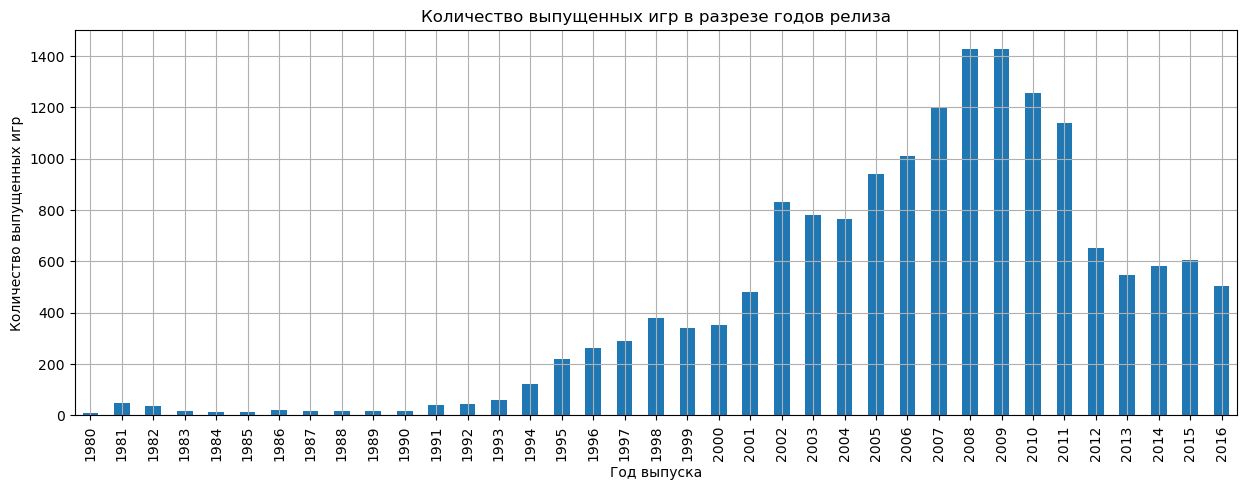

In [108]:
games_by_years = data.groupby('year_of_release')['all_sales'].agg('count').reset_index()

(
 games_by_years.plot(
                     kind = 'bar', 
                     y = 'all_sales',
                     x = 'year_of_release', 
                     ylabel = 'Количество выпущенных игр', 
                     xlabel = 'Год выпуска', 
                     figsize = (15,5),
                     legend = False,
                     grid = True
                    )
               .set_title('Количество выпущенных игр в разрезе годов релиза')
);

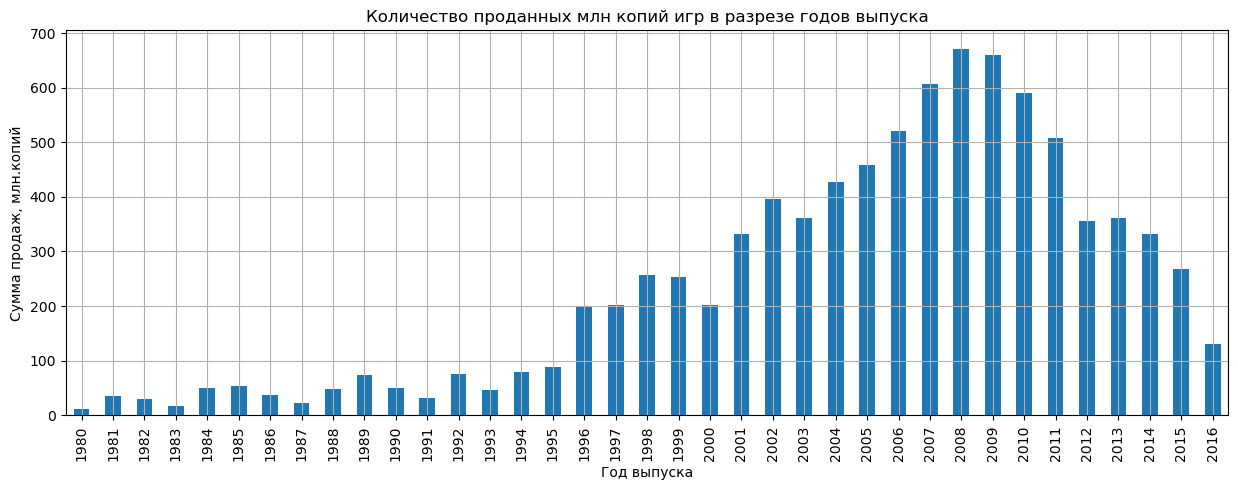

In [109]:
sales_by_years = data.groupby('year_of_release')['all_sales'].agg('sum').reset_index()
sales_by_years.columns = ['year_of_release', 'all_sales']

(
 sales_by_years.plot(
                     kind = 'bar', 
                     y = 'all_sales',
                     x = 'year_of_release', 
                     ylabel = 'Сумма продаж, млн.копий', 
                     xlabel = 'Год выпуска', 
                     figsize = (15,5),
                     legend = False,
                     grid = True
                    )
               .set_title('Количество проданных млн копий игр в разрезе годов выпуска')
);

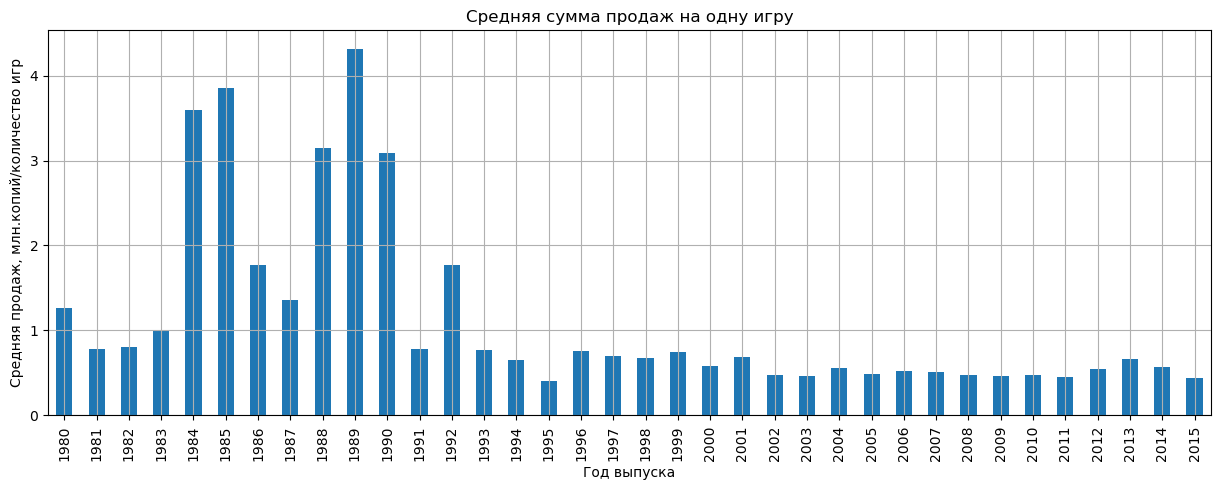

In [110]:
#Исключаем 2016 год, так как знаем, что у нас по нему неполные данные. Иначе можно будет подумать, что продажи упали в 2016
mean_sales_by_years = (
                       data[data['year_of_release'] < 2016]
                       .groupby('year_of_release')['all_sales']
                       .agg('mean')
                       .reset_index()
                      )

mean_sales_by_years.columns = ['year_of_release', 'all_sales_mean']

(
 mean_sales_by_years.plot(
                          kind = 'bar', 
                          y = 'all_sales_mean',
                          x = 'year_of_release', 
                          ylabel = 'Средняя продаж, млн.копий/количество игр', 
                          xlabel = 'Год выпуска', 
                          figsize = (15,5),
                          legend = False,
                          grid = True
                         )
                    .set_title('Средняя сумма продаж на одну игру')
);

**Вывод**:

По данным о количестве выпускаемых игр в год мы можем судить об экономическом цикле продаж. 

В период с 1980 по 1996 выпускается небольшое количество игр, поэтому в связи с их небольшим количеством количество проданных копий на одну игру было в этот период максимальным за все время исследования. 

На период 1996 по 2008 пришелся "бум" компьютерных игр - на рынок вышло множество игр, и на рынке был большой объем продаж. Но после 2009 года количество выпускаемых игр устремилось вниз, что объясняется последствиями кризиса 2008 года. 

Начиная с 2012 года количество выпускаемых игр стабилизировалось после падения, но объемы продаж после стабилизации в 2012-2013 гг продолжили падение в 2014 и 2015. 

Здесь можно увидеть всплеск в связи с открытием новой отрасли, и его постепенное движение к стадии зрелости. Это означает, что за это время на рынке появились крупные опытные конкуренты, с которыми сложнее конкурировать. Также переход в стадию зрелости может означать насыщение рынка - покупатели не испытывают дефицита в новых играх, и возможно, продолжают играть в старые.

Не смотря на вспески и падения продаж, можно увидеть, что в среднем с 1993 года величина продаж на 1 игру изменялась не сильно. Это значит, что при построении модели прогнозирования успеха игры стоит учесть отрицательное влияние кризисов на рынок компьютерных игр, но и не стоит надеяться, что в благоприятный период среднее количество проданных копий компьютерных игр будет увеличиваться. 

Мы не можем принять решение об удалении, например, игр из старых периодов, т.к. из пункта 2.6 (обзор данных с помощью describe) мы узнали, что старые игры могут быть очень популярны. Чтобы принять решение об удалении части выгрузки, нужно узнать, "жива" ли еще сама платформа?

#### Исследование количества выпущенных игр для платформ в разрезе лет

In [111]:
#Соберем сводную таблицу, чтобы значения всегда были под рукой
platforms = (
             data.pivot_table(index='platform', 
                              values=['all_sales', 'year_of_release'], 
                              aggfunc={'all_sales':['count', 'sum'], 
                                       'year_of_release':['min', 'median', 'max']
                                      })
                 .reset_index()
                 #.sort_values(by='sum')
            )

platforms.columns = ['platform', 'count', 'all_sales', 'max_year', 'median_year', 'min_year']
platforms['percent'] = platforms['all_sales'] / data['all_sales'].sum() * 100
platforms['period'] = platforms['max_year'] - platforms['min_year']

display(platforms.sort_values(by='all_sales'))

,platform,count,all_sales,max_year,median_year,min_year,percent,period
14,PCFX,1,0.03,1996,1996.0,1996,0.000340,0
9,GG,1,0.04,1992,1992.0,1992,0.000453,0
1,3DO,3,0.10,1995,1995.0,1994,0.001132,1
24,TG16,2,0.16,1995,1995.0,1995,0.001811,0
25,WS,6,1.42,2001,2000.0,1999,0.016071,2
12,NG,12,1.44,1996,1994.5,1993,0.016298,3
22,SCD,6,1.86,1994,1994.0,1993,0.021051,1
3,DC,52,15.95,2008,2000.0,1998,0.180519,10
8,GEN,27,28.35,1994,1993.0,1990,0.320860,4
21,SAT,173,33.59,1999,1996.0,1994,0.380166,5


In [112]:
#Выведем статистики по сводной таблице данных для платформ
platforms.describe()

,count,all_sales,max_year,median_year,min_year,percent,period
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,531.193548,285.020000,2005.258065,2001.741935,1997.645161,3.225806,7.612903
std,618.549994,345.469202,9.273503,8.781487,9.094131,3.909960,6.998464
min,1.000000,0.030000,1989.000000,1982.000000,1980.000000,0.000340,0.000000
25%,39.500000,22.150000,1996.000000,1995.000000,1992.500000,0.250690,3.000000
50%,247.000000,200.040000,2007.000000,2000.000000,1996.000000,2.264018,6.000000
75%,884.500000,302.030000,2016.000000,2009.500000,2004.500000,3.418323,10.000000
max,2135.000000,1248.120000,2016.000000,2015.000000,2013.000000,14.126004,31.000000


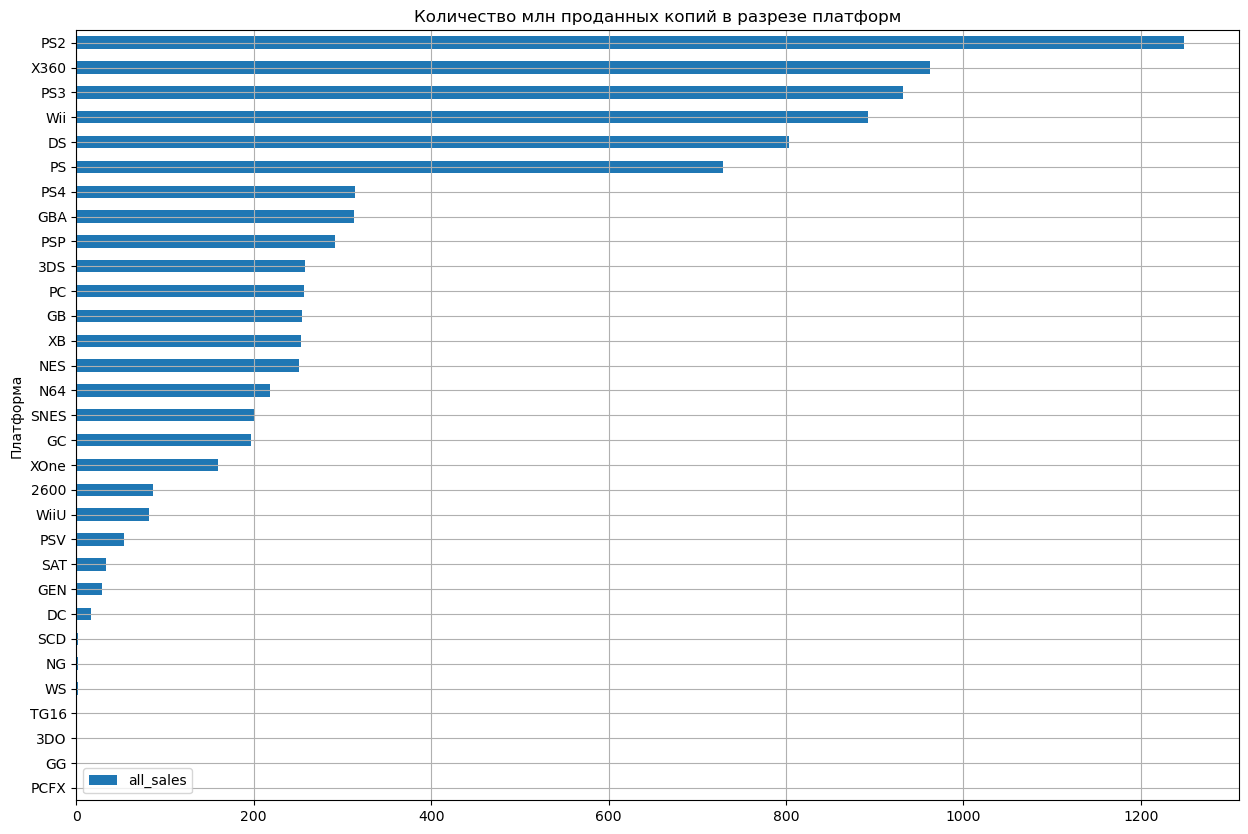

In [113]:
#Вывод гистограммы c суммой продаж на платформе
(
    platforms
    .sort_values(by='all_sales')
    .plot(kind = 'barh', 
          y = 'all_sales',
          x = 'platform', 
          ylabel = 'Сумма продаж в млн копий', 
          xlabel = 'Платформа', 
          figsize = (15,10),
          grid = True
         )
    .set_title('Количество млн проданных копий в разрезе платформ')
)

plt.show()

In [114]:
all_sales_by_pltf = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').reset_index()
less_than_median = all_sales_by_pltf.loc[all_sales_by_pltf['all_sales'] < 200, 'all_sales'].sum() / data['all_sales'].sum()
print('Потеря данных в случае удаления платформ с суммой продаж меньше медианы составит:',  less_than_median)

Потеря данных в случае удаления платформ с суммой продаж меньше медианы составит: 0.07489796980857033


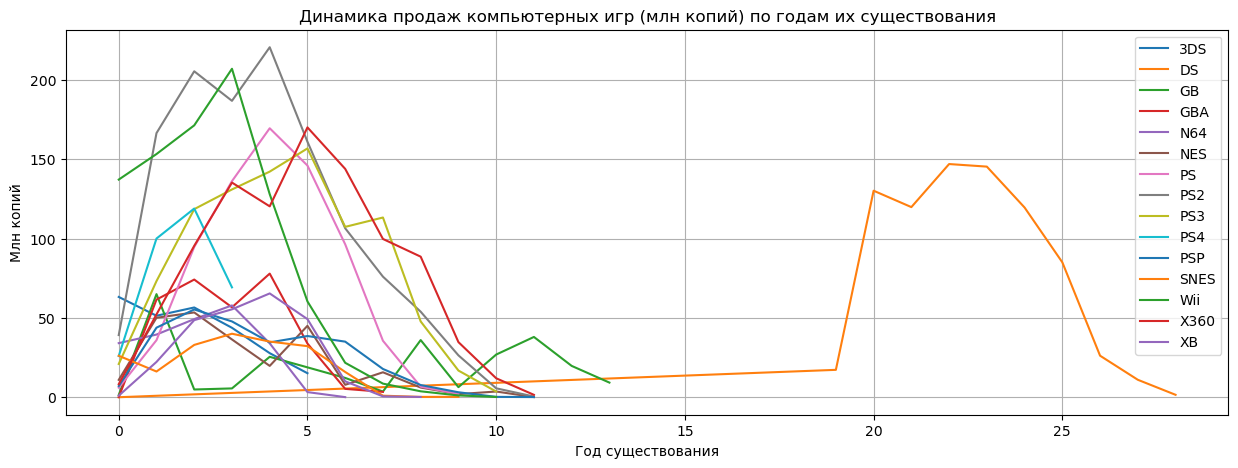

Фрагмент таблицы с выбросом DS. В столбце year_number - год существования платформы


,platform,year_of_release_x,all_sales_x,year_of_release_y,year_number
6,DS,1985,0.02,1985,0
7,DS,2004,17.27,1985,19
8,DS,2005,130.14,1985,20
9,DS,2006,119.81,1985,21
10,DS,2007,146.94,1985,22
11,DS,2008,145.32,1985,23
12,DS,2009,119.54,1985,24
13,DS,2010,85.02,1985,25
14,DS,2011,26.18,1985,26
15,DS,2012,11.01,1985,27


In [115]:
#Определим средний период существования платформы
#Оставим на графике только платформы с продажами выше медианной. И еще уберем PC, т.к. это "вечная" платформа
high_sales_platforms = platforms.loc[(platforms['all_sales'] > 200) & (platforms['platform'] != 'PC'), 
                                    'platform'].tolist()

#Создадим таблицу, на основе которой в дальнейшей соберем график и оставим в таблице только платформы с высокими продажами
platform_existence_cycle = (
                            data[data['platform'].isin(high_sales_platforms)]
                            .pivot_table(
                                         index=['platform', 'year_of_release'], 
                                         values='all_sales', 
                                         aggfunc='sum')
                            .reset_index()
                           )

#Добавим в таблицу номер года существования платформы
#Для этого получим декартово произведение...
platform_existence_cycle = platform_existence_cycle.merge(platform_existence_cycle, on = 'platform')
#...И оставим только минимальный год из добавившихся столбцов справа
platform_existence_cycle = (
                            platform_existence_cycle.pivot_table(
                                                                 index=['platform', 'year_of_release_x', 'all_sales_x'], 
                                                                 values='year_of_release_y', 
                                                                 aggfunc='min')
                                                    .reset_index()
                           )
#Рассчитаем разницу между текущим годом и минимальным
platform_existence_cycle['year_number'] = platform_existence_cycle['year_of_release_x'] - platform_existence_cycle['year_of_release_y'] 

#Создадим график на основе данной таблицы
fig, ax = plt.subplots()

for platform in platform_existence_cycle['platform'].unique():
    x = platform_existence_cycle.loc[platform_existence_cycle['platform'] == platform, 'year_number']
    y = platform_existence_cycle.loc[platform_existence_cycle['platform'] == platform, 'all_sales_x']
    ax.plot(x, y, label = platform)

ax.set_title('Динамика продаж компьютерных игр (млн копий) по годам их существования')
ax.set_xlabel('Год существования')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show();

print('Фрагмент таблицы с выбросом DS. В столбце year_number - год существования платформы')
display(platform_existence_cycle[platform_existence_cycle['platform'] == 'DS'])

**Вывод:**

На графике явно виден выброс - продажи платформы DS. Возможно, в 1985 году была какая-то непопулярная платформа с таким же именем, либо была допущена ошибка при формировании первичных данных. Скорректируем данные и обновим график

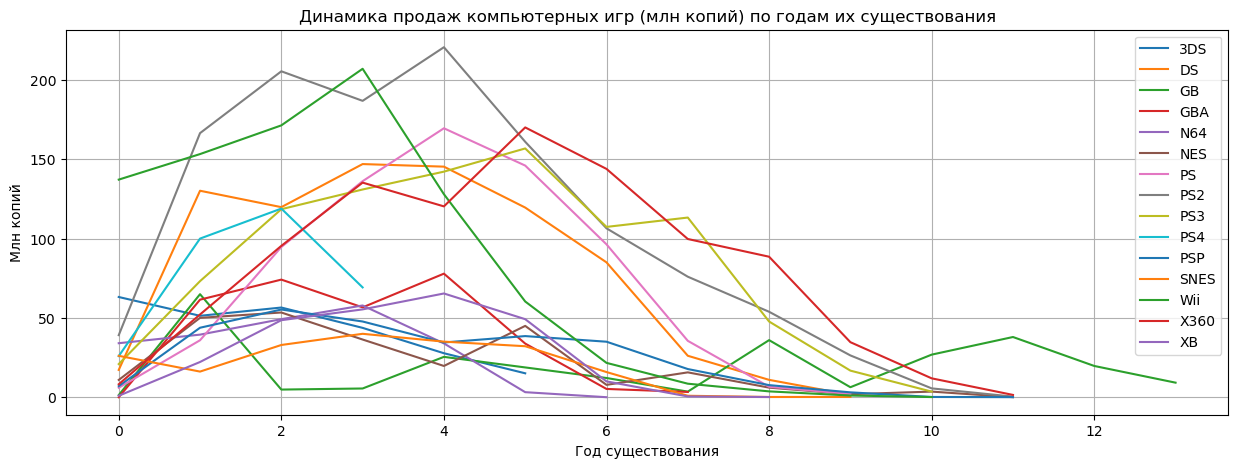

In [116]:
#Убираем строку DS 1985 года из исходника
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]

#Создаем таблицу заново, как в прошлый раз
platform_existence_cycle = (
                            data[data['platform'].isin(high_sales_platforms)]
                            .pivot_table(
                                         index=['platform', 'year_of_release'], 
                                         values='all_sales', 
                                         aggfunc='sum')
                            .reset_index()
                           )
platform_existence_cycle = platform_existence_cycle.merge(platform_existence_cycle, on = 'platform')
platform_existence_cycle = (
                            platform_existence_cycle.pivot_table(
                                                                 index=['platform', 'year_of_release_x', 'all_sales_x'], 
                                                                 values='year_of_release_y', 
                                                                 aggfunc='min')
                                                    .reset_index()
                           )
platform_existence_cycle['year_number'] = platform_existence_cycle['year_of_release_x'] - platform_existence_cycle['year_of_release_y'] 

#Создадим график на основе данной таблицы
fig, ax = plt.subplots()

for platform in platform_existence_cycle['platform'].unique():
    x = platform_existence_cycle.loc[platform_existence_cycle['platform'] == platform, 'year_number']
    y = platform_existence_cycle.loc[platform_existence_cycle['platform'] == platform, 'all_sales_x']
    ax.plot(x, y, label = platform)

ax.set_title('Динамика продаж компьютерных игр (млн копий) по годам их существования')
ax.set_xlabel('Год существования')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show();

**Вывод:**

Выявлено, что среднее время существования платформы - примерно 10 лет, из которых рост платформы приходится примерно на первые 4 года, а потом с 4 по 10й год начинается спад. 

В связи с этим оставим в своде только данные за 4 года: 2013(вкл.)-2016 гг.

In [117]:
#Удалим из data данные раньше 2013 года
data = data[data['year_of_release'] >= 2013]

#### Исследование платформ в разрезе продаж в динамике

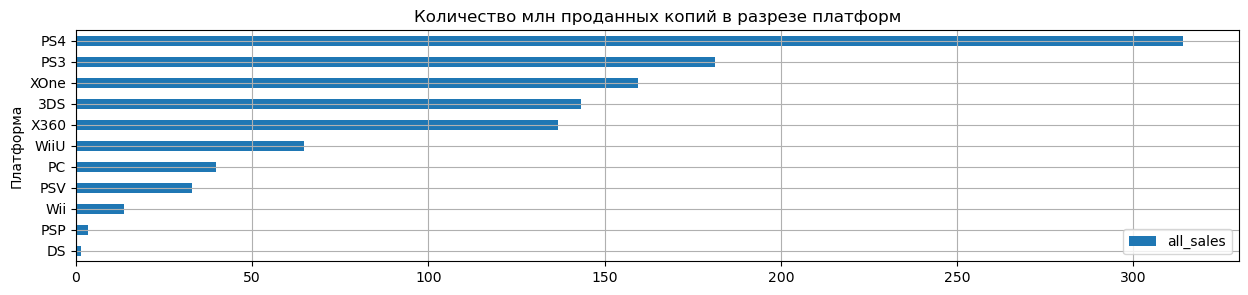

In [118]:
#Вывод гистограммы c суммой продаж на платформе
(
    data.pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .reset_index()
    .sort_values(by='all_sales')
    .plot(kind = 'barh', 
          y = 'all_sales',
          x = 'platform', 
          ylabel = 'Сумма продаж в млн копий', 
          xlabel = 'Платформа', 
          figsize = (15,3),
          grid = True
         )
    .set_title('Количество млн проданных копий в разрезе платформ')
)

plt.show()

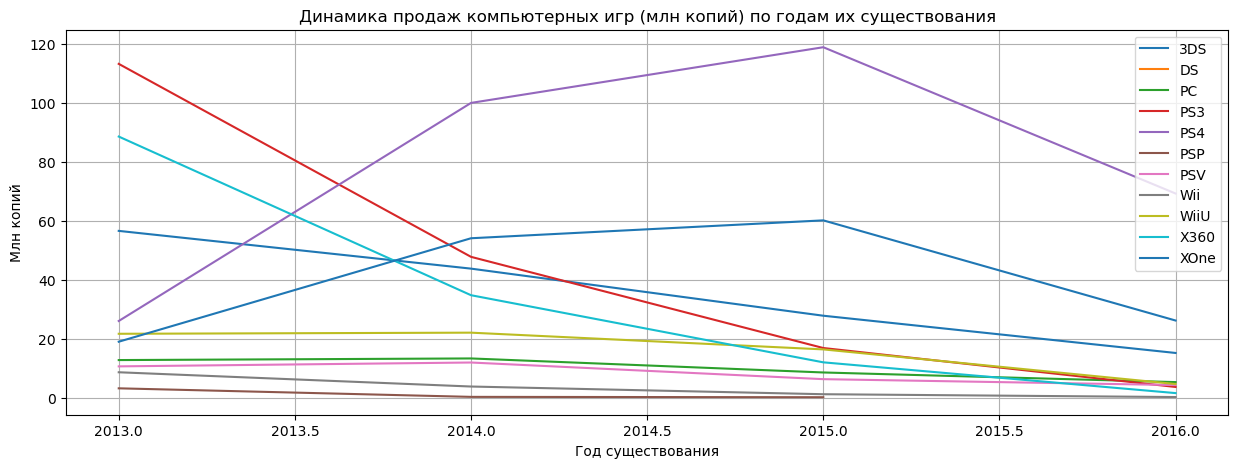

In [119]:
#Создаем сводную таблицу для удобства
sales_in_dynamic = data.pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum').reset_index()

#Создадим график на основе данной таблицы

fig, ax = plt.subplots()

for platform in sales_in_dynamic['platform'].unique():
    x = sales_in_dynamic.loc[sales_in_dynamic['platform'] == platform, 'year_of_release']
    y = sales_in_dynamic.loc[sales_in_dynamic['platform'] == platform, 'all_sales']
    ax.plot(x, y, label = platform)

ax.set_title('Динамика продаж компьютерных игр (млн копий) по годам их существования')
ax.set_xlabel('Год существования')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show();

**Вывод:**

На графике видно прекращение поддержки PSP (в 2014), DS (в 2013, поэтому на графике не видно) - новую игру на данной платформе выпустить невозможно. 

Также на графике видно падание продаж на устаревших платформах PS3, X360, Wii. Поэтому, новая игра на таких платформах вряд ли обретет популярность.

При этом на графике виден запуск и рост популярности платформ PS4 и XOne, которые являются обновленными версиями платформ PS и XBox. Т.к., это продукты известных брендов, и они сейчас только набирают популярность, то возможно, что разработка игр именно на этих платформах сможет обеспечить возможность для роста популярности игры.

Также не стоит забывать про PC - это "вечная" платформа. У пусть у данной платформы продажи меньше, чем у PS4 и XOne, но пользователи могут дольше покупать разработанную игру, не ограничиваясь периодом в 10 лет.

На графике видны "не взлетевшие" продукты PSV (запуск в 2011), 3DS (2011) и WiiU (2012) - после появления им так и не удалось набрать популярность.

#### Ящики с усами по глобальным продажам игр в разбивке по платформам

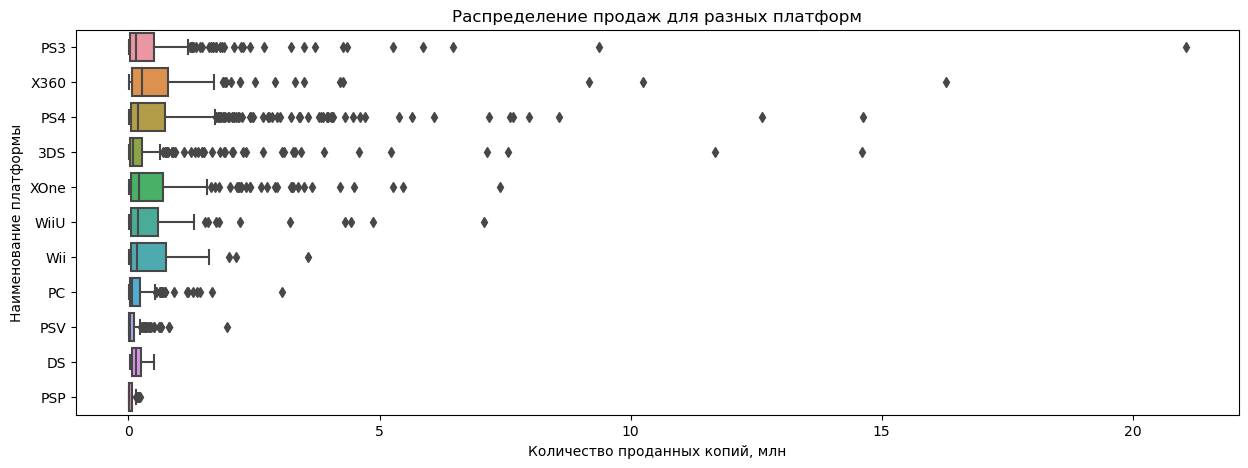

''

In [120]:
#Построим горизонтальные boxplot для каждой платформы
fig, ax = plt.subplots()

#Обрежем величину продаж на уровне 4 млн копий, чтобы на графике было поменьше выбросов
sns.boxplot(
            data=data, 
            x='all_sales', 
            y='platform', 
            orient = 'h'
           )

ax.set_title('Распределение продаж для разных платформ')
ax.set_xlabel('Количество проданных копий, млн')
ax.set_ylabel('Наименование платформы')

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show()
;

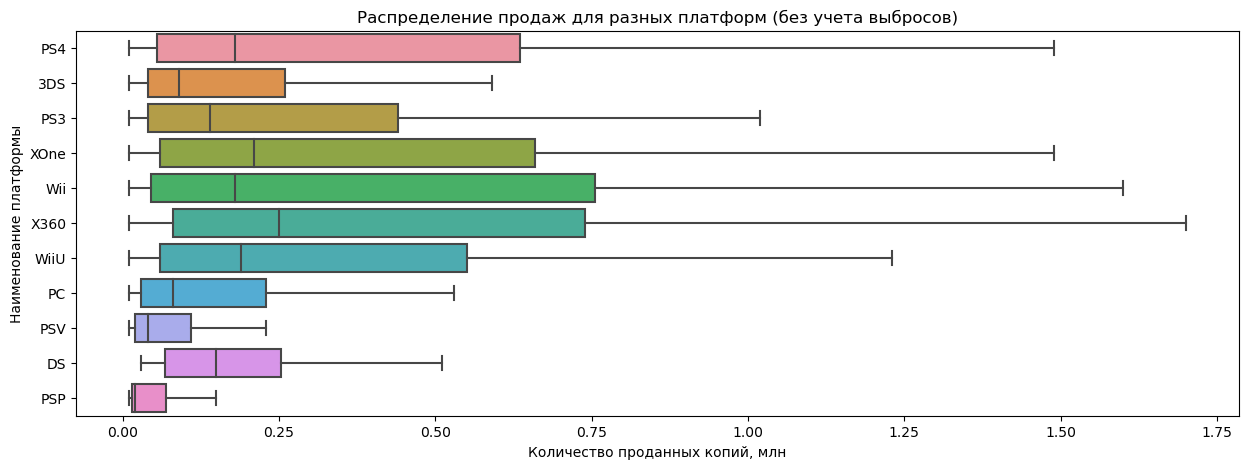

''

In [121]:
fig, ax = plt.subplots()

sns.boxplot(
            data=data[data['all_sales'] < 4], 
            x='all_sales', 
            y='platform', 
            orient = 'h',
            showfliers = False
           )

ax.set_title('Распределение продаж для разных платформ (без учета выбросов)')
ax.set_xlabel('Количество проданных копий, млн')
ax.set_ylabel('Наименование платформы')

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show()
;

**Вывод:**

На графике видно, что межквантильные размахи с максимальными значениями в 0.75 квантиле (т.е., на таких платформах есть хорошая вероятность для игры получить более высокие продажи) относятся к платформам PS4, PS3, XOne, Wii, X360, WiiU. Но ранее мы выяснили, что платформы PS3, X360, Wii уже "отработали" свой цикл (поэтому высокие показатели продаж могут объясняться накопленным эффектом), а WiiU так и не набрала популярности (поэтому высокие показатели могут объясняться низкой конкуренцией).

Зато на графике можно увидеть, что всего на третьем году XOne уже догоняет по межкварртильному размаху своего предшественника X360, а PS4 уже обогнала PS3. При этом у XOne медианное значение немного больше, чем у PS4. При необходимости выбора между двумя платформами стоит предпочесть XOne, но если есть возможность, то стоит выпустить игру на обеих платформах, так как они входят в топ самых популярных платформ.

Показатель платформы нужно использовать для прогнозирования популярности игры, так как от популярности платформы зависит объем потенциальных покупателей

#### Исследование зависимости продаж от отзывы пользователей и критиков на примере XOne

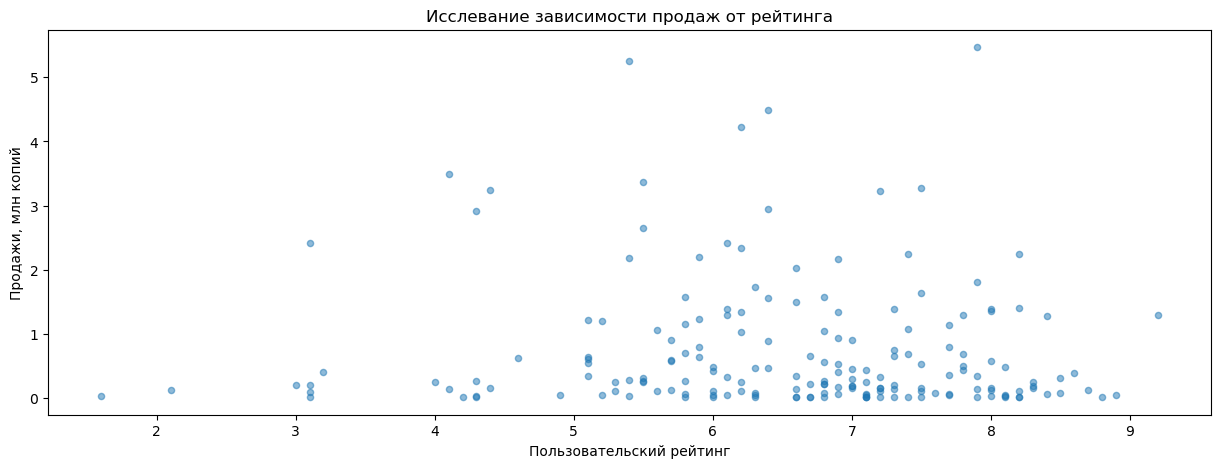

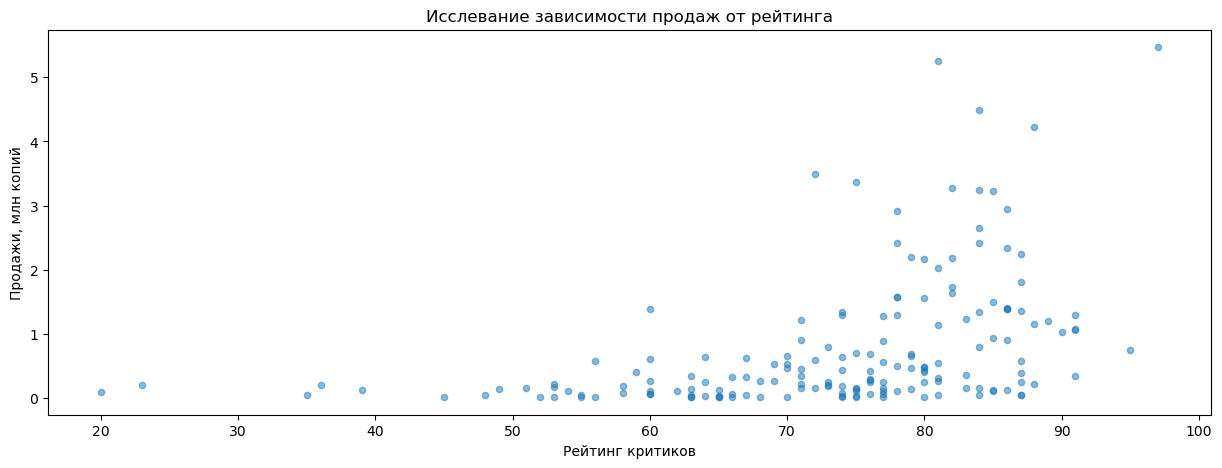

In [122]:
#Рассмотрим на примере платформы XOne, так как это самая популярная платформа в выборке
data[data['platform'] == 'XOne'].plot(x = 'user_score', 
                                      y = 'all_sales', 
                                      kind = 'scatter', 
                                      title = 'Исслевание зависимости продаж от рейтинга',
                                      xlabel = 'Пользовательский рейтинг',
                                      ylabel = 'Продажи, млн копий',
                                      alpha = 0.5,
                                      figsize = (15,5) 
                                     );
data[data['platform'] == 'XOne'].plot(x = 'critic_score', 
                                      y = 'all_sales', 
                                      kind = 'scatter', 
                                      title = 'Исслевание зависимости продаж от рейтинга',
                                      xlabel = 'Рейтинг критиков',
                                      ylabel = 'Продажи, млн копий',
                                      alpha = 0.5,
                                      figsize = (15,5) 
                                     );

**Вывод:**

На графиках распределений не видна сильная зависимость продаж от рейтингов, но можно отметить следующее: продажи практически не превышают 1 млн копий для игр с оценкой пользователей ниже 6 или при оценке критиков менее 70 

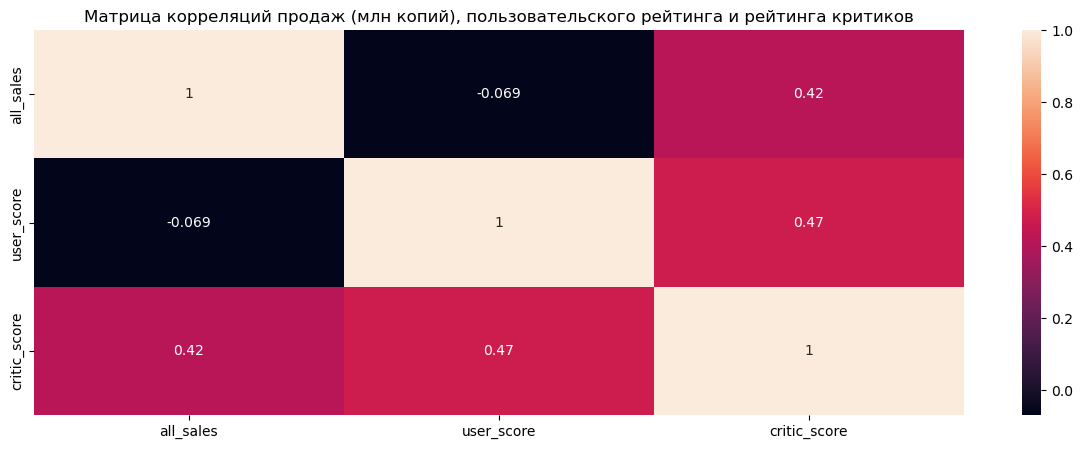

''

In [123]:
#Построим матрицу корреляций
fig, ax = plt.subplots()

sns.heatmap(data.loc[data['platform'] == 'XOne', ['all_sales', 'user_score', 'critic_score']].corr(), annot=True)

ax.set_title('Матрица корреляций продаж (млн копий), пользовательского рейтинга и рейтинга критиков')

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show()

;

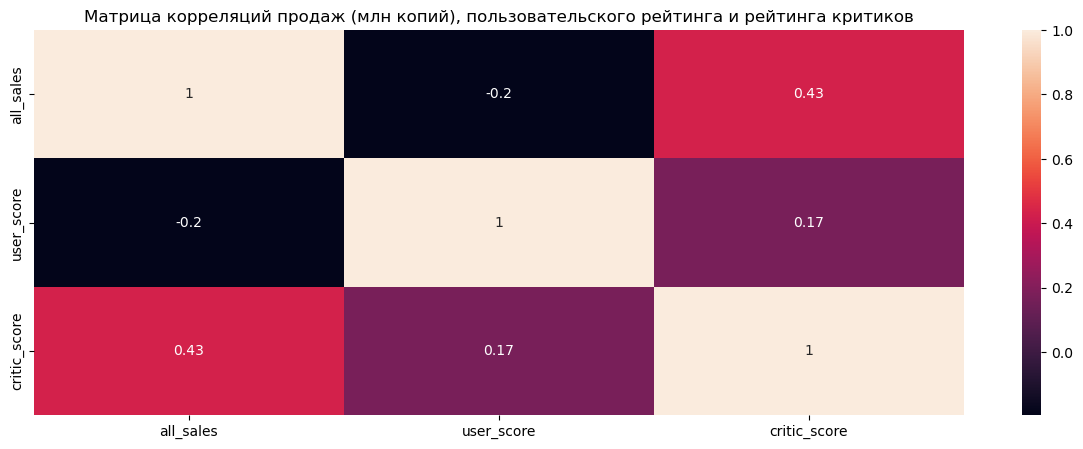

''

In [124]:
#Скорректируем матрицу корреляций, и оставим в ней только те значения, начиная с которых, 
#как показали графики распределения, можно увидеть увеличение продаж при увеличении рейтингов
fig, ax = plt.subplots()

sns.heatmap(data.loc[((data['platform'] == 'XOne') & (data['user_score']>=6) & (data['critic_score']>=70)), 
                     ['all_sales', 'user_score', 'critic_score']]
                .corr(), annot=True)

ax.set_title('Матрица корреляций продаж (млн копий), пользовательского рейтинга и рейтинга критиков')

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show()

;

**Вывод:**

Расчет корреляций показал слишком слабую связь между показателем продаж и отзывами пользователей, но это не значит, что связь между ними отсутствует. Ранее выявлено, что продажи практически не превышают 1 млн копий для игр с оценкой пользователей ниже 6, поэтому данную информацию все равно можно использовать для модели прогнозирования популярности игры, но присвоить данному показателю небольшой вес.

Умеренно выраженную взаимосвязь уровня продаж удалось выявить с рейтингом критиков. Особенно выражена зависимость при оценке критиков выше 70. Часто это логично: критик проставляет оценку беспристрастно, по утвержденной методике и показателям, а пользователь за время игры мог полюбить ее при всех недостатках и поставить оценку повыше. Показатель оценки критиков определенно необходимо использовать в прогнозной модели.

#### Исследование зависимости продаж от отзывы пользователей и критиков для всех платформ

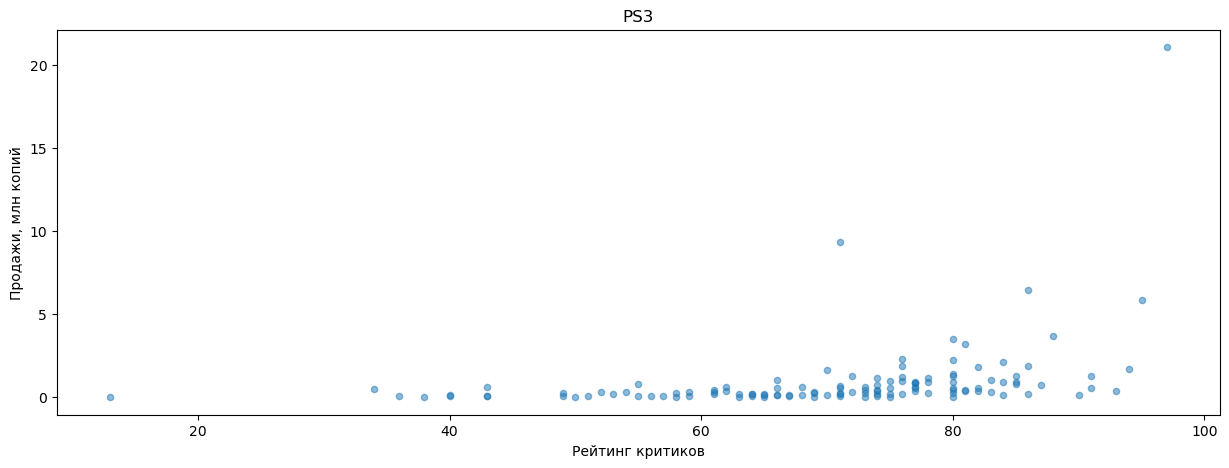

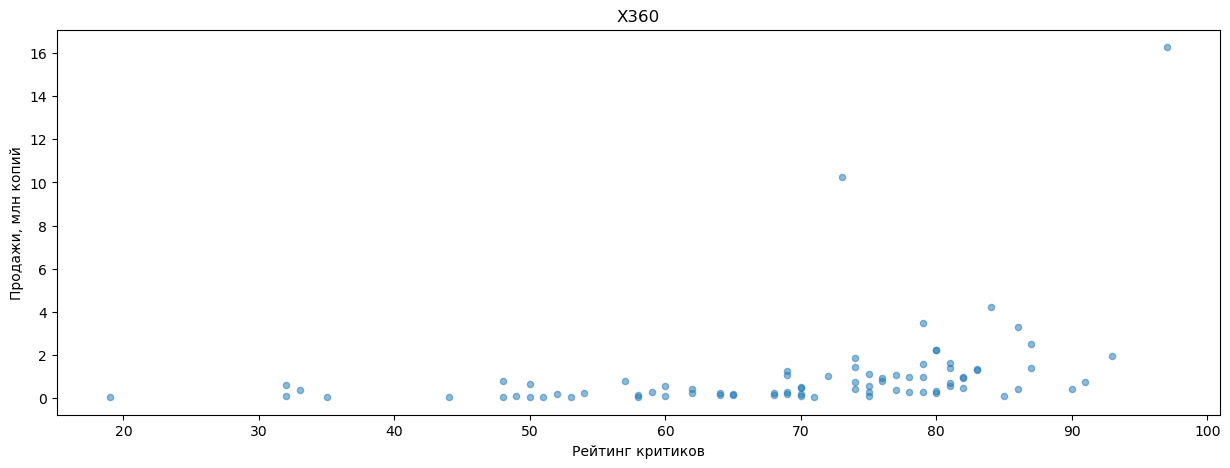

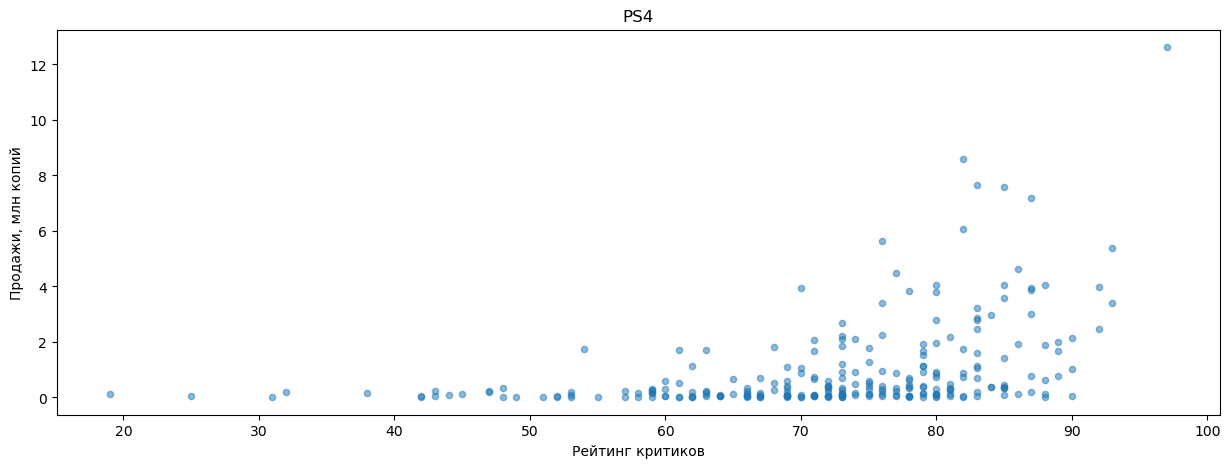

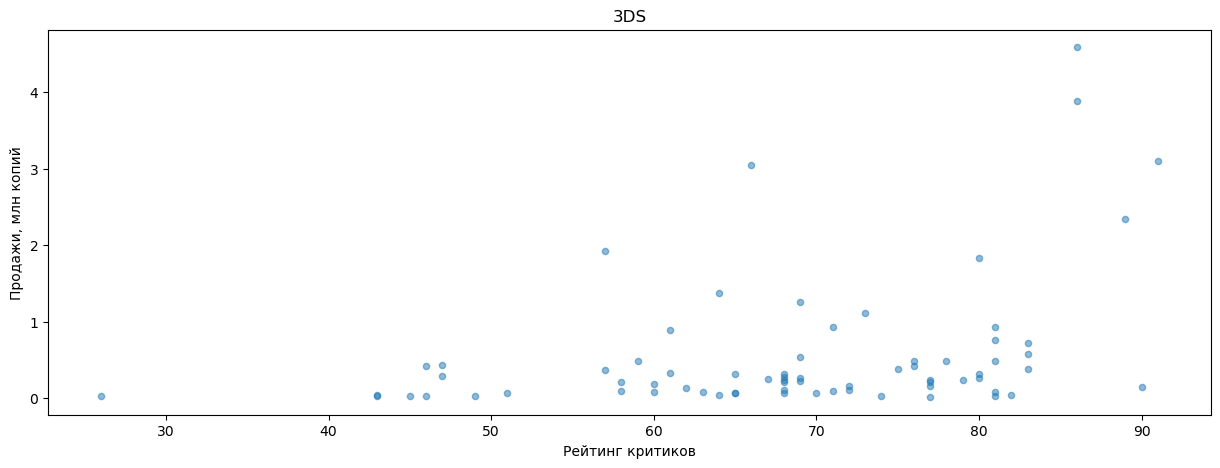

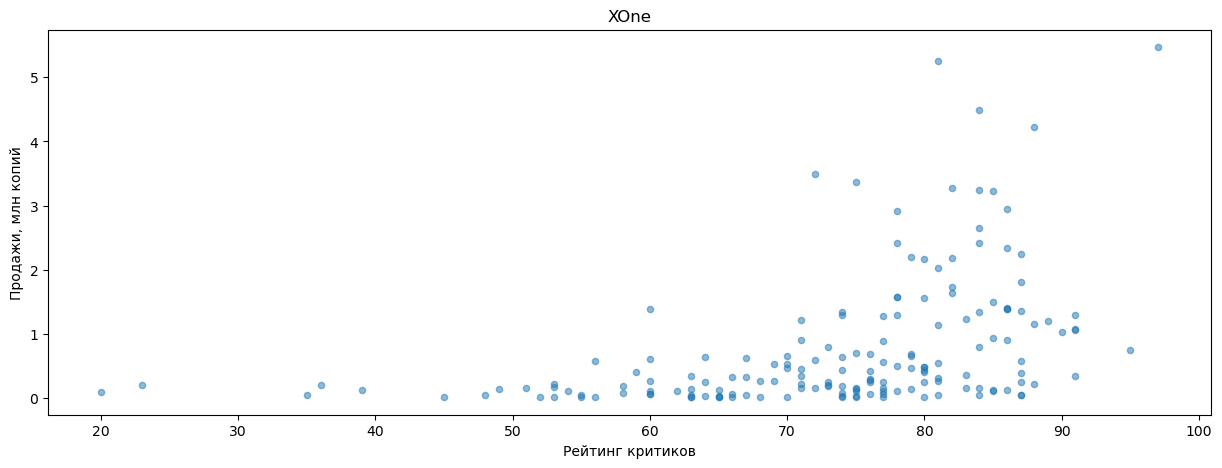

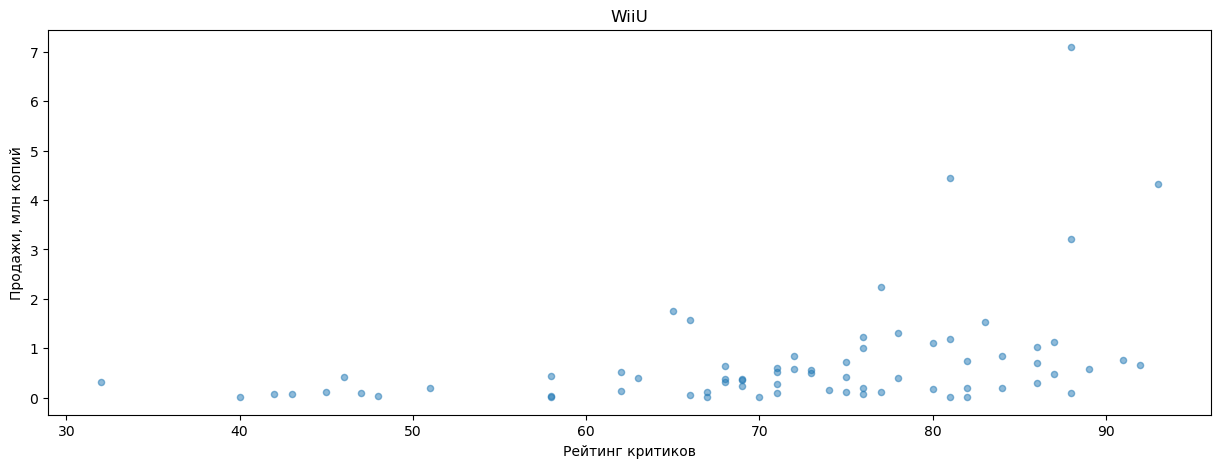

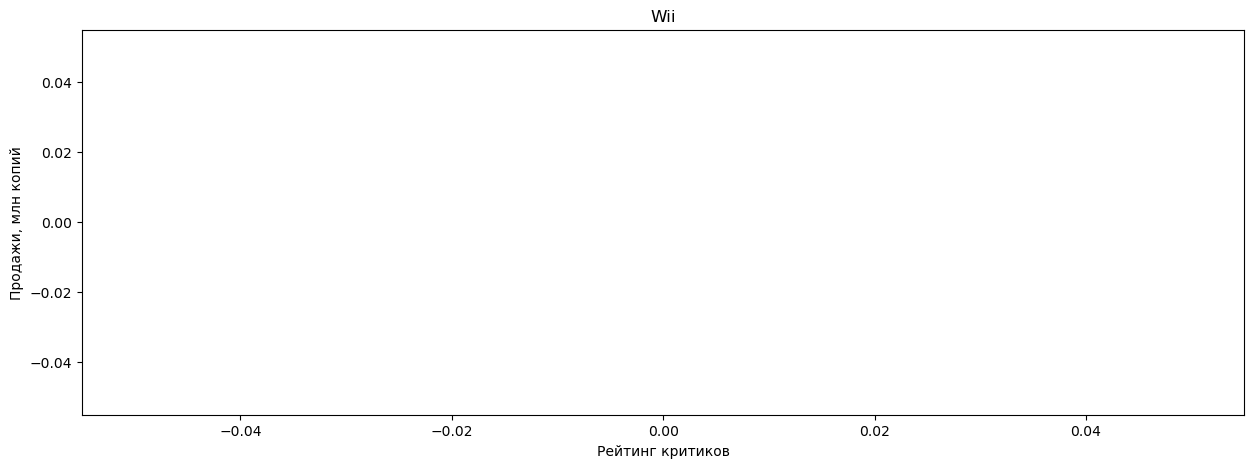

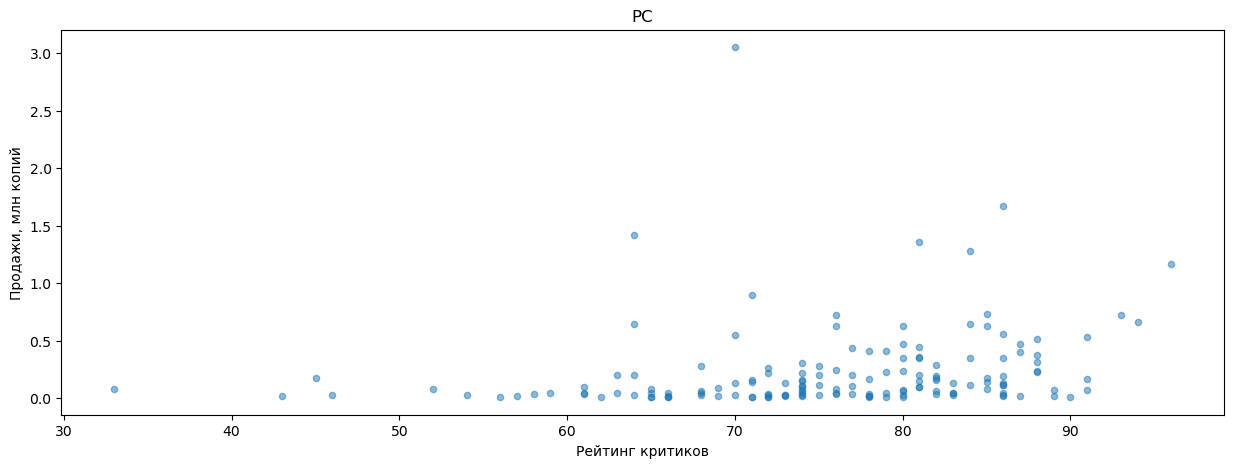

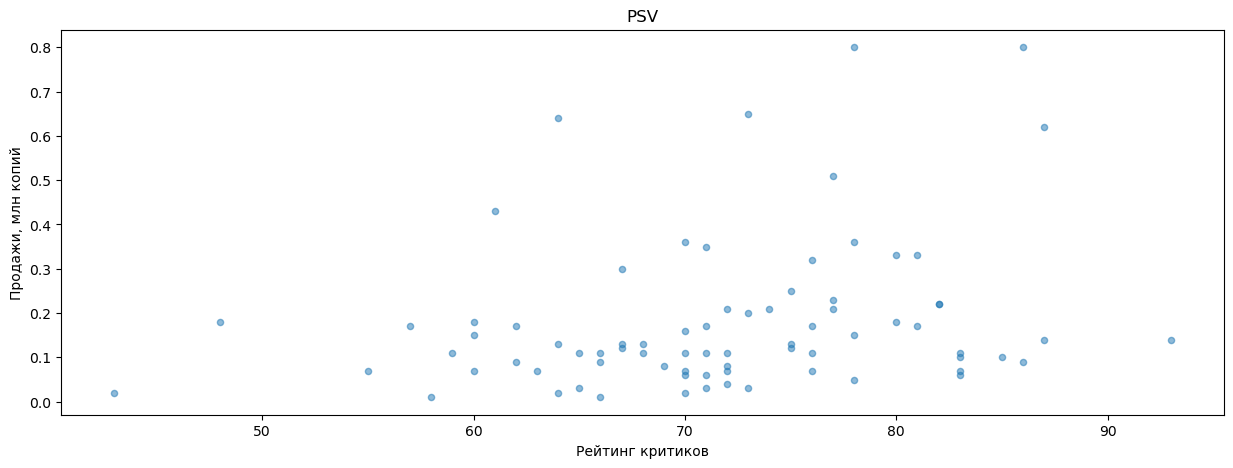

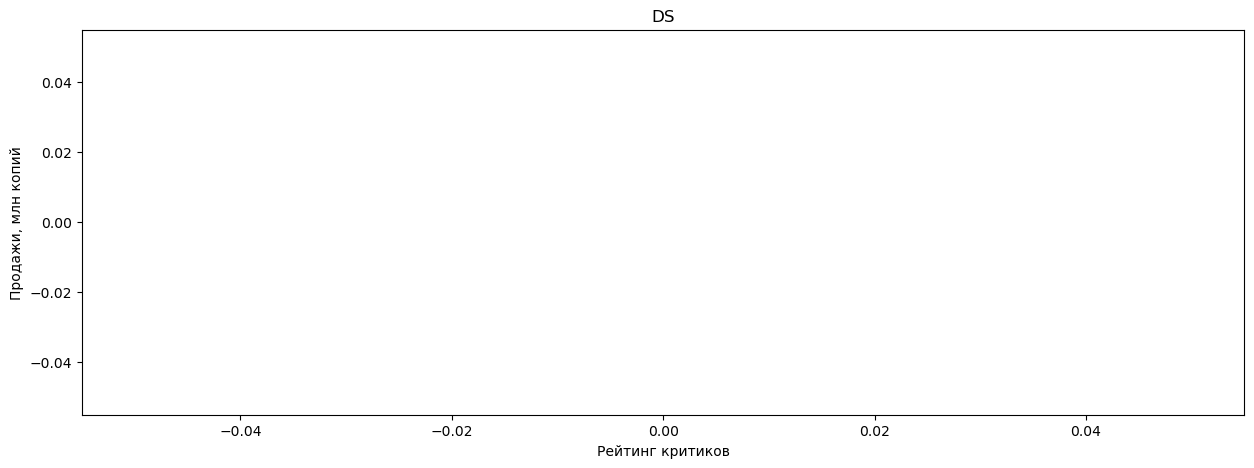

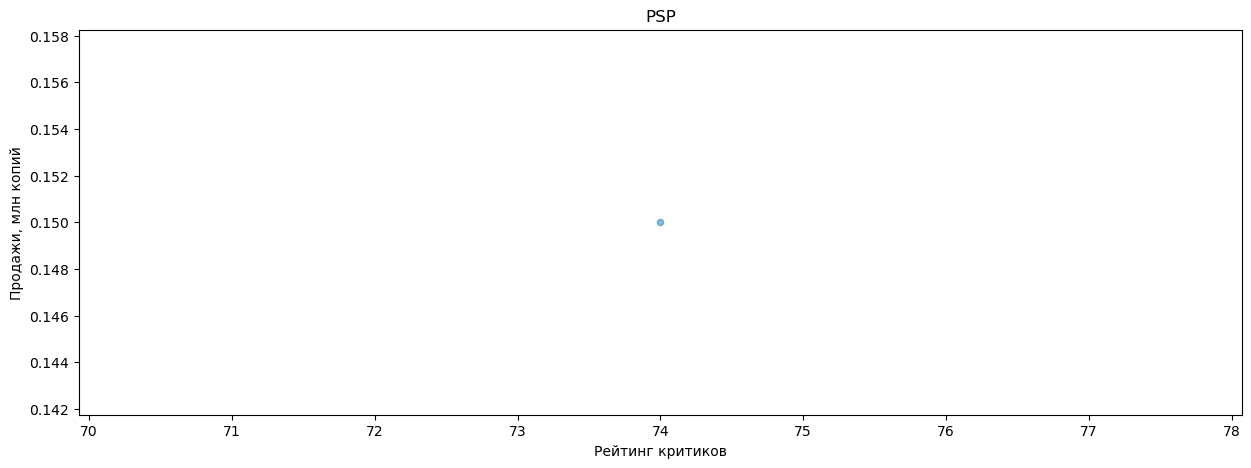

In [125]:
for platform in data['platform'].unique():
    data[data['platform'] == platform].plot(x = 'critic_score', 
                                      y = 'all_sales', 
                                      kind = 'scatter', 
                                      title = platform,
                                      xlabel = 'Рейтинг критиков',
                                      ylabel = 'Продажи, млн копий',
                                      alpha = 0.5,
                                      figsize = (15,5),
                                     );


**Вывод:**
  
На всех графиках можно увидеть, что в среднем продажи выше для игр с рейтингами критиков выше 70. 

Для платформ Wii, DS, PSP на графиках слишком мало значений для формирования выводов.

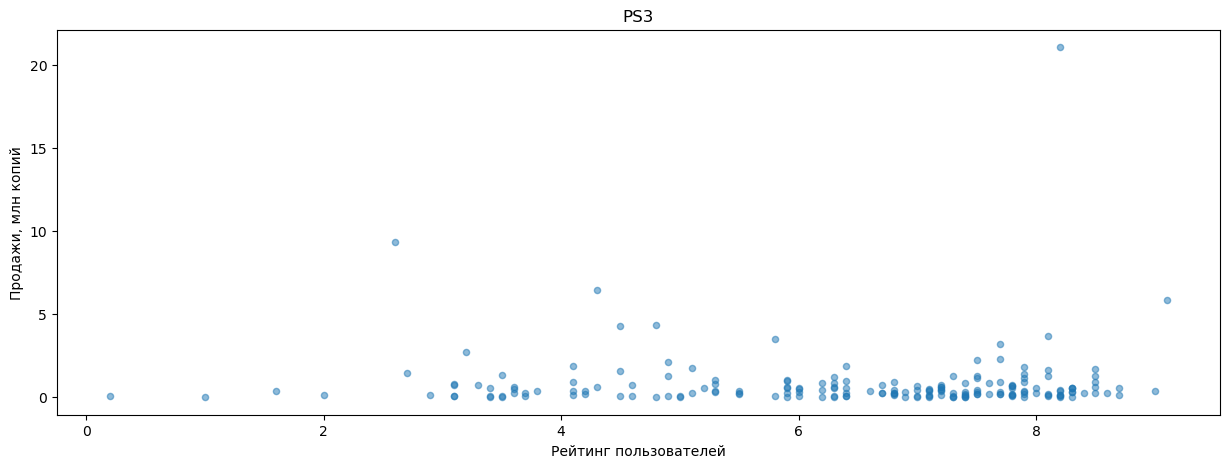

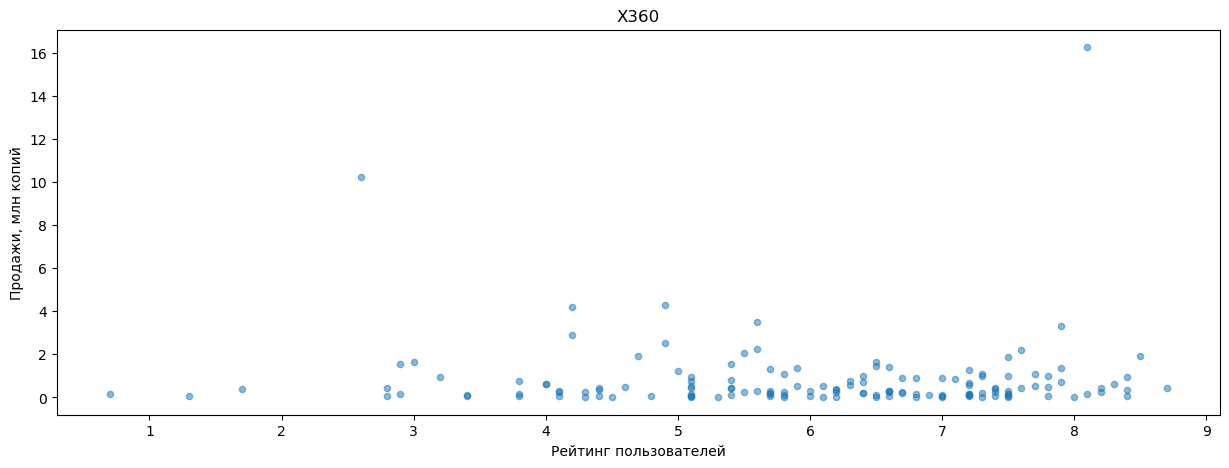

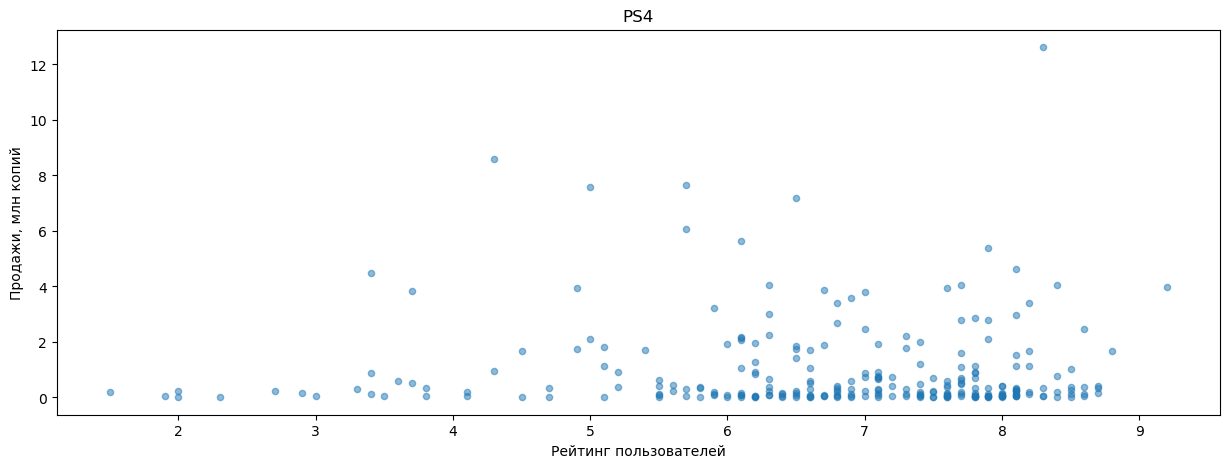

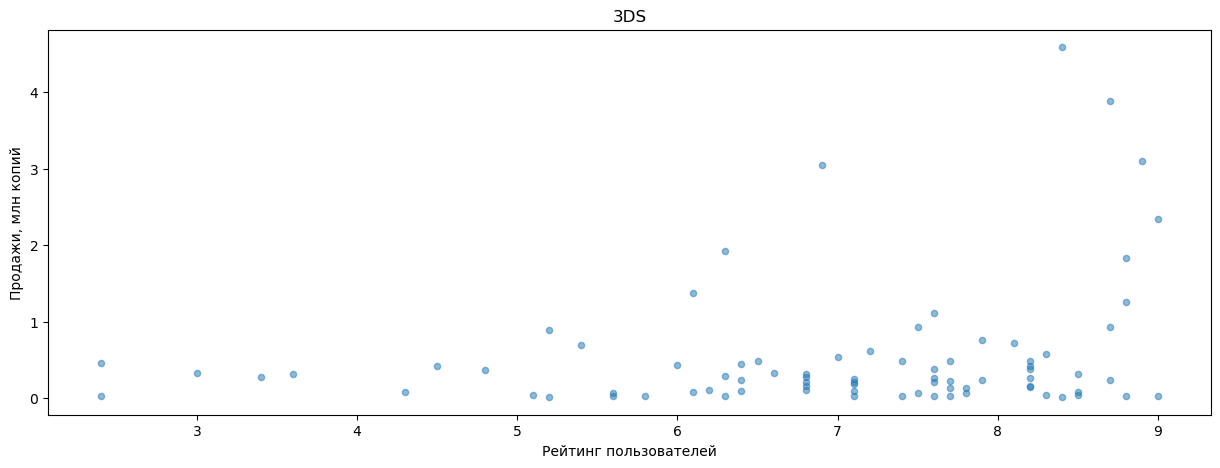

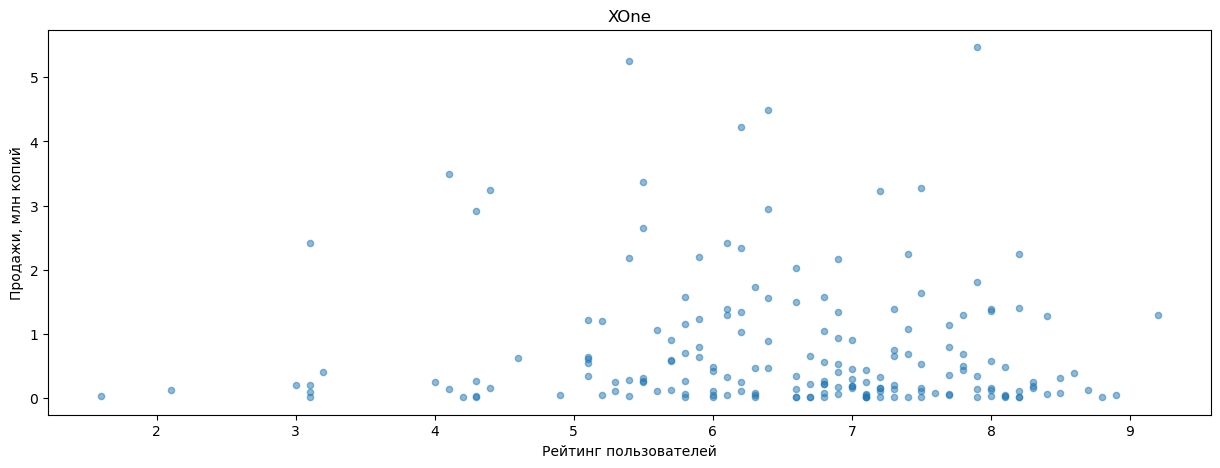

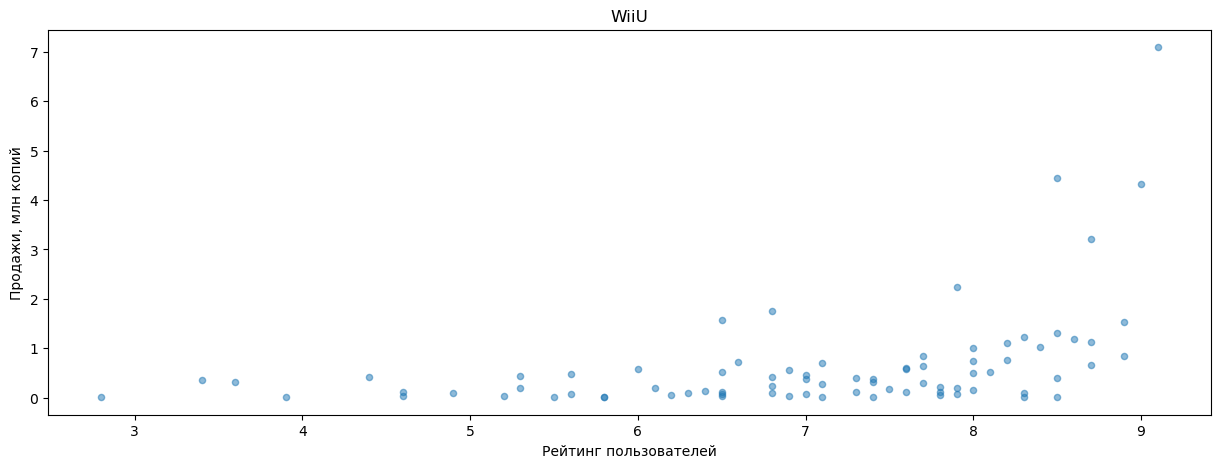

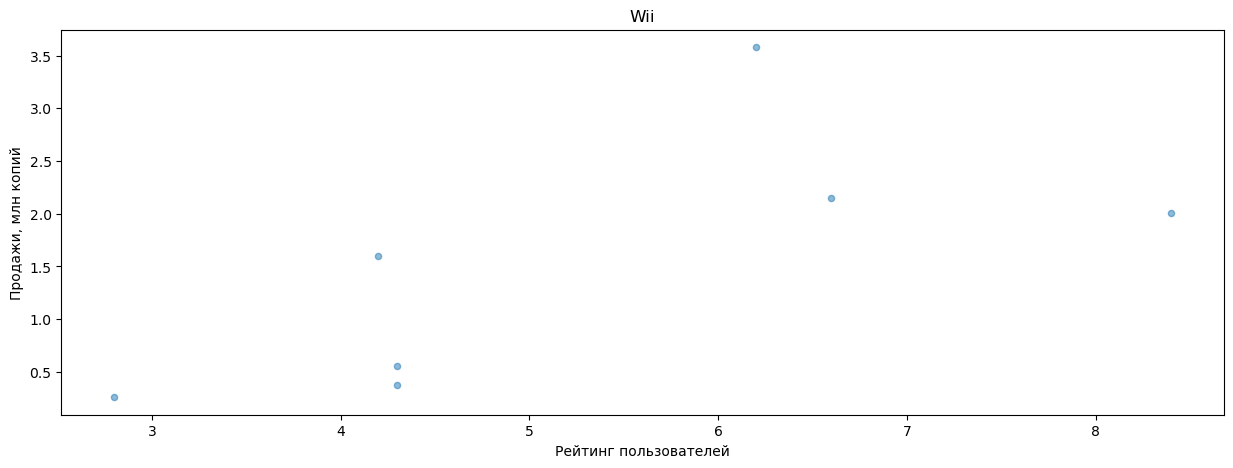

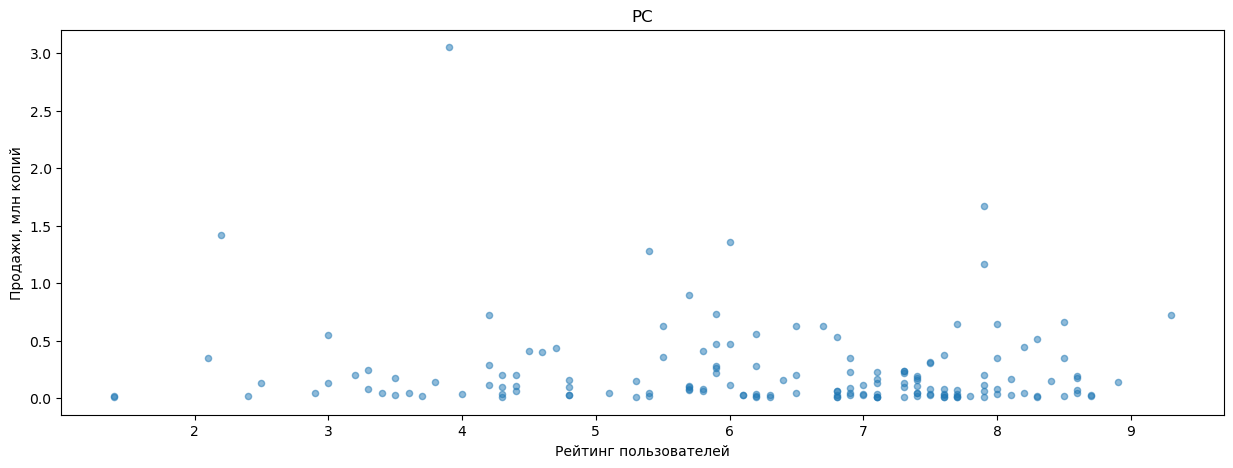

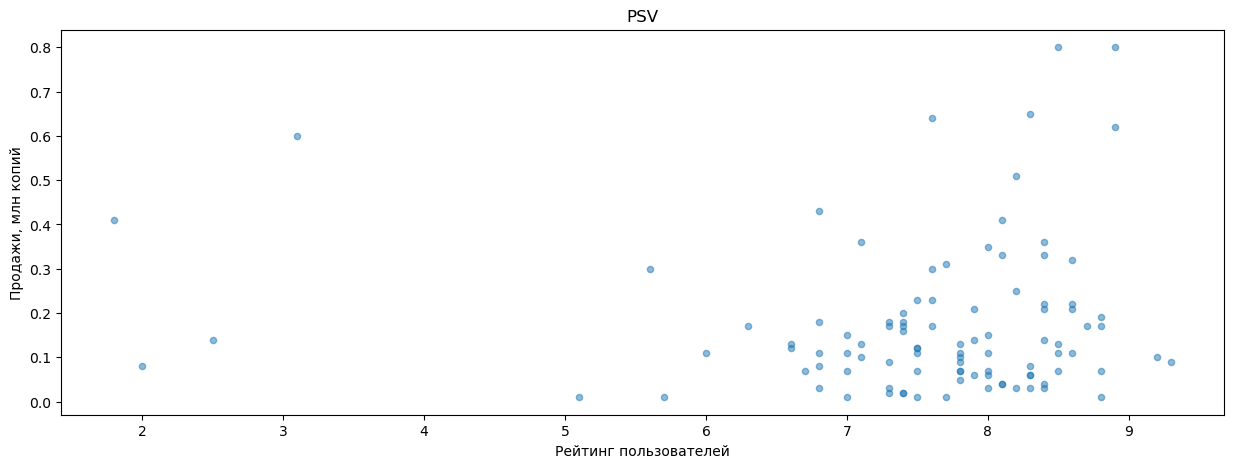

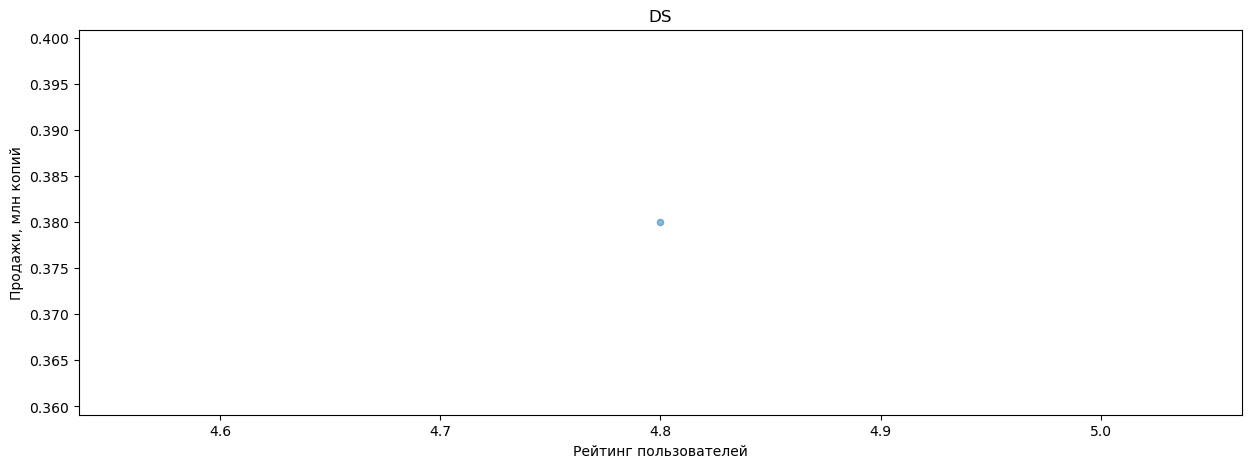

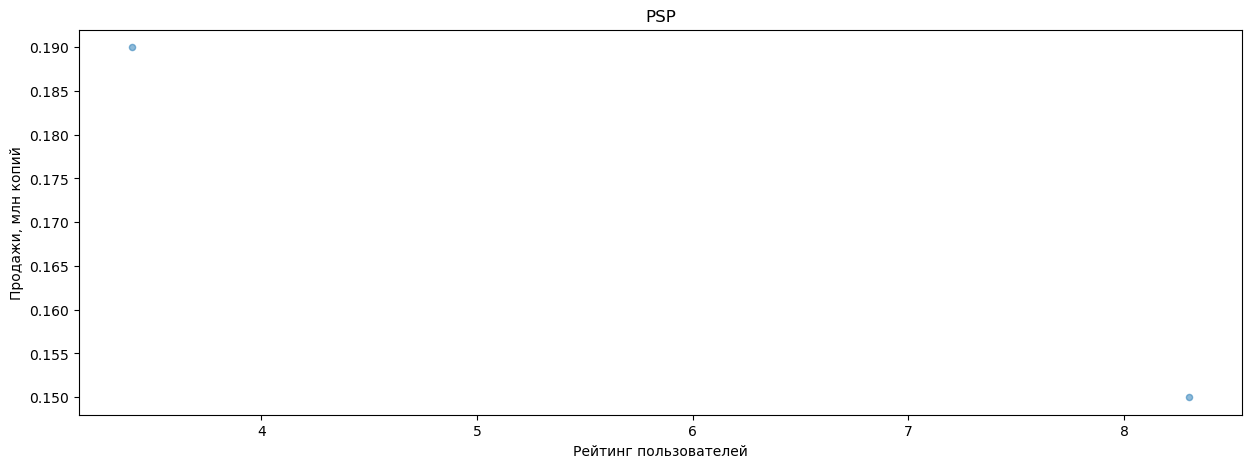

In [126]:
for platform in data['platform'].unique():
    data[data['platform'] == platform].plot(x = 'user_score', 
                                      y = 'all_sales', 
                                      kind = 'scatter', 
                                      title = platform,
                                      xlabel = 'Рейтинг пользователей',
                                      ylabel = 'Продажи, млн копий',
                                      alpha = 0.5,
                                      figsize = (15,5),
                                     );

**Вывод:**
  
На всех графиках можно увидеть, что в среднем продажи выше для игр с рейтингами пользователей критиков выше 6. 

Для платформ Wii, DS, PSP на графиках слишком мало значений для формирования выводов.

Получается, что минимально успешные оценки для всех платформ примерно одинаковы, и это понятно - т.к. пользователь или критик присваивает свою оценку только самой игре, без привязки к платформе

In [127]:
#Создадим сводную таблицу со значениями корреляций 
corr_table = pd.DataFrame()

for platform in data['platform'].unique():
    corr_data = data.loc[data['platform']==platform, ['all_sales', 'critic_score', 'user_score']].corr().reset_index()
    new_line = corr_data[corr_data['index'] == 'all_sales'].copy()
    new_line['index'] = platform
    corr_table = pd.concat([corr_table, new_line], ignore_index=True)
    
display(corr_table)

,index,all_sales,critic_score,user_score
0,PS3,1.0,0.334285,0.002394
1,X360,1.0,0.350345,-0.011742
2,PS4,1.0,0.406568,-0.031957
3,3DS,1.0,0.357057,0.241504
4,XOne,1.0,0.416998,-0.068925
5,WiiU,1.0,0.376415,0.419330
6,Wii,1.0,NaN,0.682942
7,PC,1.0,0.197390,-0.090552
8,PSV,1.0,0.254742,0.000942
9,DS,1.0,NaN,NaN


**Вывод:**
Из таблицы видно, что в большинстве платформ связь пользовательского рейтинга с величиной продаж слабая, а связь с рейтингами критиков - умеренно выраженная.

#### Исследование жанров

,genre,all_sales
0,Action,322.22
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


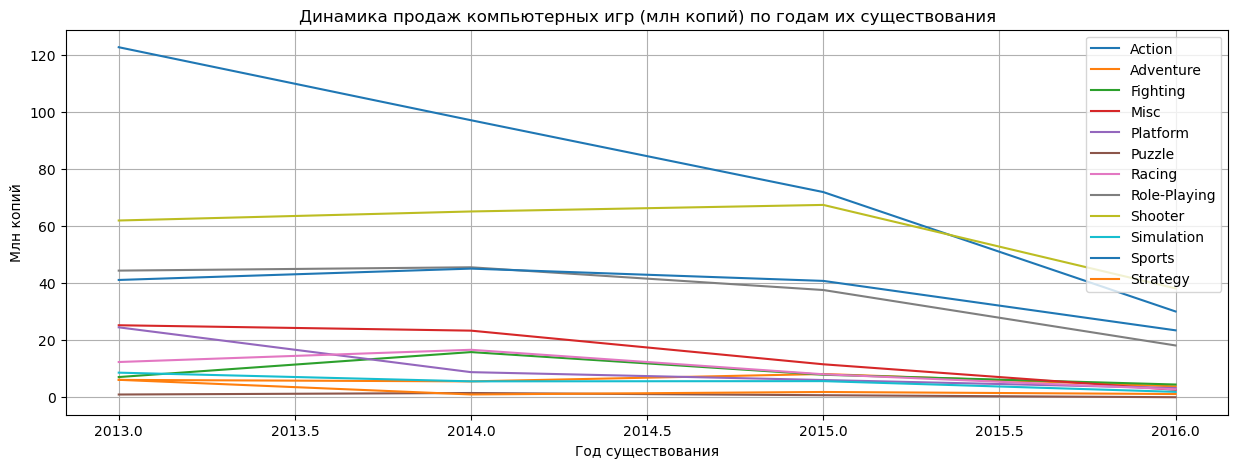

In [128]:
data_by_genre = data.pivot_table(index=['genre','year_of_release'], values='all_sales', aggfunc=['sum', 'count']).reset_index()
data_by_genre.columns = ['genre','year_of_release', 'all_sales', 'count']

display(
        data_by_genre
        .pivot_table(index='genre', values='all_sales', aggfunc='sum')
        .reset_index()
        .sort_values(by='all_sales', ascending = False)
       )

#Создадим график на основе данной таблицы

fig, ax = plt.subplots()

for genre in data_by_genre['genre'].unique():
    x = data_by_genre.loc[data_by_genre['genre'] == genre, 'year_of_release']
    y = data_by_genre.loc[data_by_genre['genre'] == genre, 'all_sales']
    ax.plot(x, y, label = genre)

ax.set_title('Динамика продаж компьютерных игр (млн копий) по годам их существования')
ax.set_xlabel('Год существования')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show();

**Вывод:**
    
Практически все исследуемое время самым популярным жанром остается Action а вторым - Shooter, но в 2016 Action уступил первенство жанру Shooter. 

3 и 4 место делят между собой Sports и Role-Playing - сумма проданных млн копий между ними не сильно отличается.

Все остальные жанры получили на порядок меньшие уровни продаж. 

Из графика можно сделать вывод, что в текущий момент у игры больше шансов стать популярной, если она в жанре Action, Shooter, Sports или Role-Playing, но нельзя исключать, что вкусы пользователей меняются

,genre,median
,,all_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100


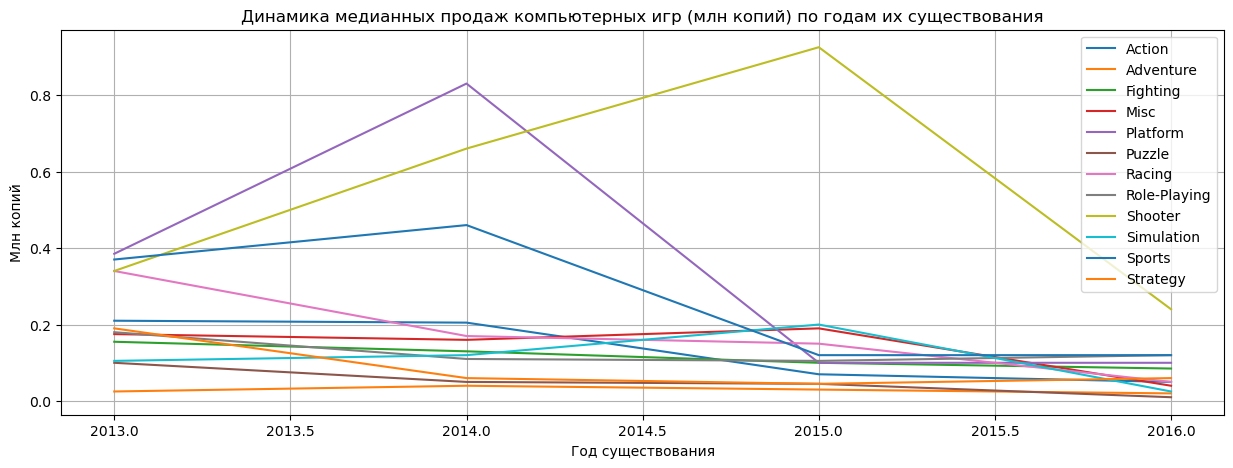

In [129]:
display(
        data.pivot_table(index=['genre'], values='all_sales', aggfunc=['median'])
            .reset_index()
            .sort_values(by=('median', 'all_sales'), ascending = False)
       )

data_by_genre_by_years = data.pivot_table(
                                          index=['genre','year_of_release'], 
                                          values='all_sales', 
                                          aggfunc=['median']).reset_index()

data_by_genre_by_years.columns = ['genre','year_of_release', 'median']

#Создадим график на основе данной таблицы

fig, ax = plt.subplots()

for genre in data_by_genre_by_years['genre'].unique():
    x = data_by_genre_by_years.loc[data_by_genre_by_years['genre'] == genre, 'year_of_release']
    y = data_by_genre_by_years.loc[data_by_genre_by_years['genre'] == genre, 'median']
    ax.plot(x, y, label = genre)

ax.set_title('Динамика медианных продаж компьютерных игр (млн копий) по годам их существования')
ax.set_xlabel('Год существования')
ax.set_ylabel('Млн копий')
plt.grid()
plt.legend()

fig.set_figwidth(15)
fig.set_figheight(5)

plt.show();

**Вывод:**

На графике видно, что по состоянию на 2015-2016 гг жанром с самым высоким уровнем медианных продаж является жанр Shooter. У данного жанра также большой отрыв от прочих жанров. С одной стороны, возможно, у новой игры в жанре Shooter больше шансов получить в среднем более высокие продажи, но с другой в будущих периодах может произойти пересыщение рынка.

Следующими за жанром Shooter в 2016 году идут: Action, Role-Playing, Platform, Fighting.

### Портрет пользователя каждого региона

#### Cамые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

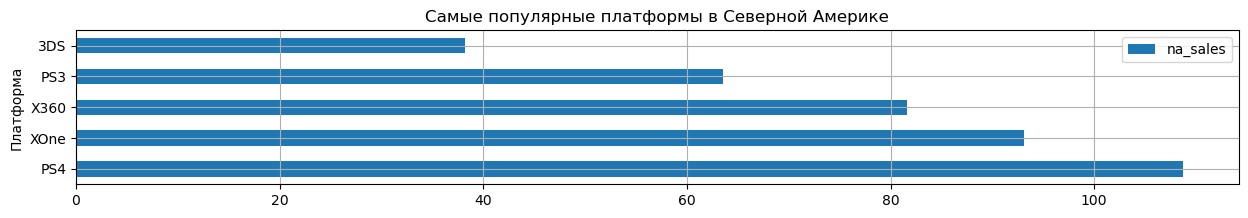

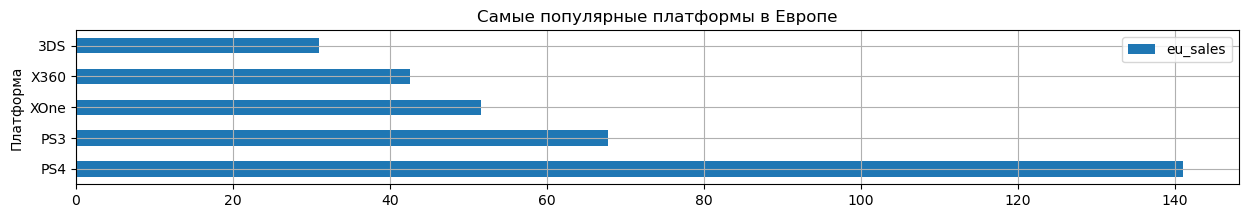

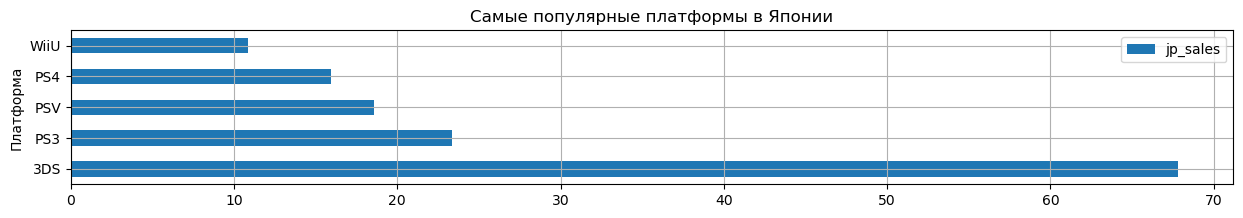

In [130]:
#Сгруппированная таблица для удобства дальнейшего анализа
all_sales_platform = data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales','all_sales']].agg('sum').reset_index()

(
all_sales_platform.sort_values(by='na_sales', ascending=False)
                  .head()
                  .plot(kind = 'barh', 
                        y = 'na_sales',
                        x = 'platform', 
                        ylabel = 'Сумма продаж в млн копий', 
                        xlabel = 'Платформа', 
                        figsize = (15,2),
                        grid = True
                       )
                  .set_title('Самые популярные платформы в Северной Америке')
)

(
all_sales_platform.sort_values(by='eu_sales', ascending=False)
                  .head()
                  .plot(kind = 'barh', 
                        y = 'eu_sales',
                        x = 'platform', 
                        ylabel = 'Сумма продаж в млн копий', 
                        xlabel = 'Платформа', 
                        figsize = (15,2),
                        grid = True
                       )
                  .set_title('Самые популярные платформы в Европе')    
)

(
all_sales_platform.sort_values(by='jp_sales', ascending=False)
                  .head()
                  .plot(kind = 'barh', 
                        y = 'jp_sales',
                        x = 'platform', 
                        ylabel = 'Сумма продаж в млн копий', 
                        xlabel = 'Платформа', 
                        figsize = (15,2),
                        grid = True
                       )
                  .set_title('Самые популярные платформы в Японии')   
);

**Вывод:**

Распределение платформ для Северной Америки и Европы примерно одинаково, но в Сев.Америке платформы XOne и X360 стоят на более высоких местах, что логично, т.к. это продукт американской компании Microsoft.

В Северной Америке первое и второе место занимают новые платформы PS4 и XOne, в связи с чем можно сделать вывод, что пользователи из Северной Америки больше готовы переходить на новые платформы, чем пользователи из Европы. На третьем и четвертом месте находятся предшественники платформ, занимающих первое и второе место - X360 и PS3. Замыкает список приставка Nintendo 3DS, которая в большей степени популярна у детей. 

Самой популярной платформой в Европе является японская PS4. Второе место занимает ее предшественник - PS3. Продукты американской Microsoft имеют в Европе меньшее влияние на рынок, и в связи с этим XOne и X360 занимают третье и четвертое место соответственно. Замыкает список приставка Nintendo 3DS, которая в большей степени популярна у детей. 

В Японии наиболее популярными являются приставки Nintendo 3DS, что может объясняться тем, что в Японии в компьютерные игры в основном играют дети. Следующей по популярности идет японская приставка PS3, PSV, PS4 и WiiU. Таким образом, в Японии популярны только японские приставки, XOne не вошел даже в ТОП-5. Также в Японии пользователи неохотно переходят на новые платформы.

В целях построения прогнозной модели необходимо учесть, где будет выпущена игра, и исходя из этого выбрать подходящую платформу, наиболее популярную для этого региона.

#### Cамые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)

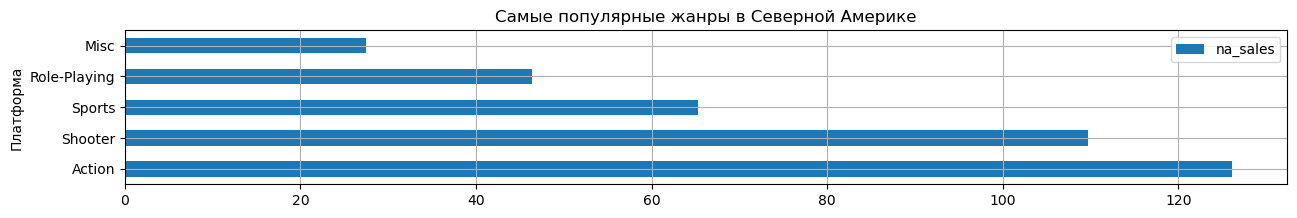

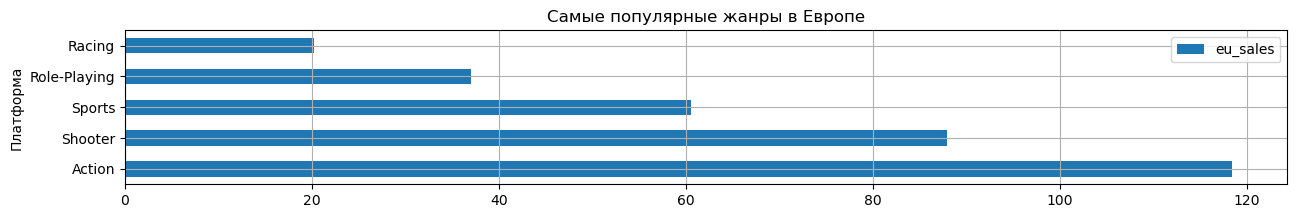

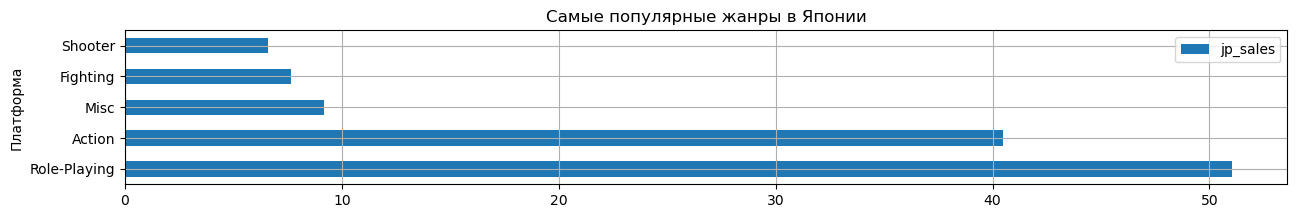

In [131]:
#Сгруппированная таблица для удобства дальнейшего анализа
all_sales_genre = data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales','all_sales']].agg('sum').reset_index()

(
all_sales_genre.sort_values(by='na_sales', ascending=False)
               .head()
               .plot(kind = 'barh', 
                     y = 'na_sales',
                     x = 'genre', 
                     ylabel = 'Сумма продаж в млн копий', 
                     xlabel = 'Платформа', 
                     figsize = (15,2),
                     grid = True
                    )
               .set_title('Самые популярные жанры в Северной Америке')
)

(
all_sales_genre.sort_values(by='eu_sales', ascending=False)
               .head()
               .plot(kind = 'barh', 
                     y = 'eu_sales',
                     x = 'genre', 
                     ylabel = 'Сумма продаж в млн копий', 
                     xlabel = 'Платформа', 
                     figsize = (15,2),
                     grid = True
                    )
               .set_title('Самые популярные жанры в Европе')    
)

(
all_sales_genre.sort_values(by='jp_sales', ascending=False)
               .head()
               .plot(kind = 'barh', 
                     y = 'jp_sales',
                     x = 'genre', 
                     ylabel = 'Сумма продаж в млн копий', 
                     xlabel = 'Платформа', 
                     figsize = (15,2),
                     grid = True
                    )
               .set_title('Самые популярные жанры в Японии')   
);

**Вывод:**

Любимые жанры игр для Северной Америки и Европы не сильно различаются (Action, Shooter, Sports), что может объясняться схожим менталитетом, культурой и распространением игр (например, игры про викингов больше зайдут в СА и Европе, а в Японии больше зайдет аниме)

В Японии наиболее распространены игры жанра Role-Playing, что скорее всего означет, что в основном в игры играют подростки, так как успешное прохождение RPG предполагает кооперацию и регулярный вход в игру

#### Влияние рейтинга ESRB на продажи в отдельных регионах

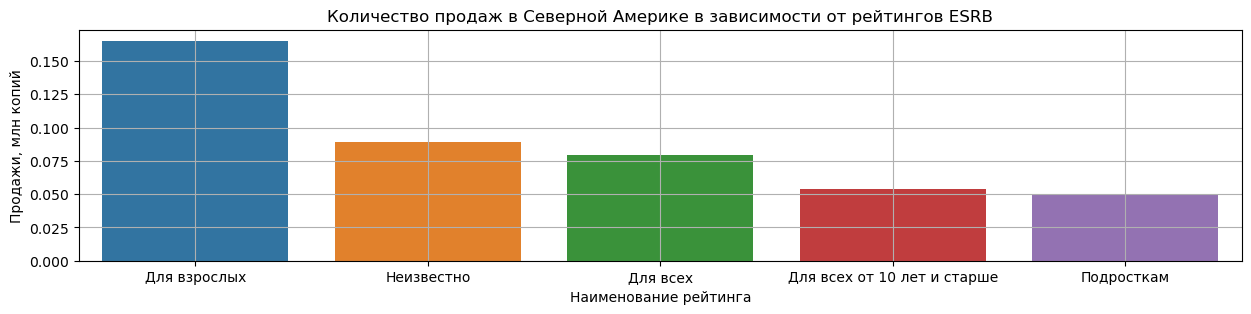

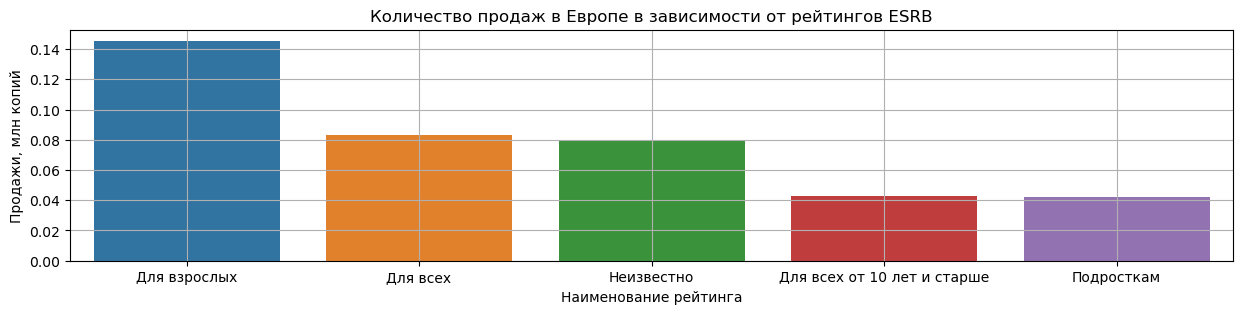

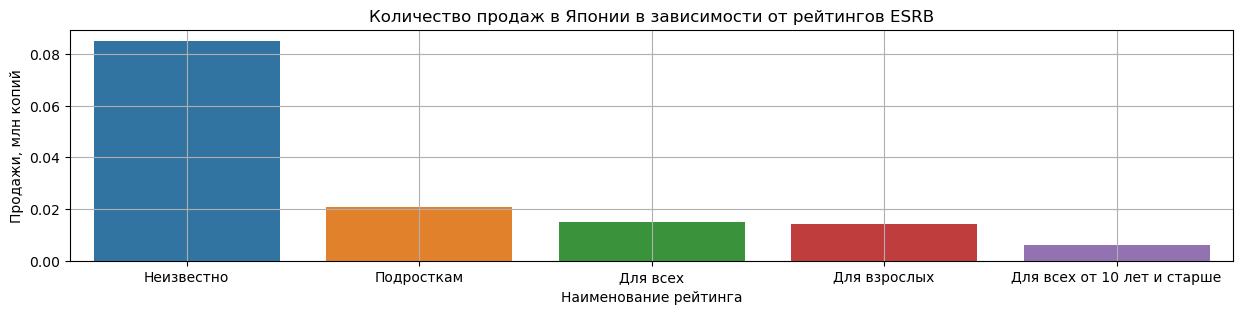

In [132]:
#Построим столбчатую диаграмму для Северной Америки:
data_na = (
           data
           .pivot_table(index='rating_type', values='na_sales', aggfunc='sum')
           .reset_index()
           .sort_values(by = 'na_sales', ascending = False)
          )

fig, ax = plt.subplots()

sns.barplot(x=data_na['rating_type'], y=data_na['na_sales'] / 1000)
ax.set_title('Количество продаж в Северной Америке в зависимости от рейтингов ESRB')
ax.set_xlabel('Наименование рейтинга')
ax.set_ylabel('Продажи, млн копий')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show();

#Построим столбчатую диаграмму для Европы:
data_na = (
           data.pivot_table(index='rating_type', values='eu_sales', aggfunc='sum')
               .reset_index()
               .sort_values(by = 'eu_sales', ascending = False)
          )

fig, ax = plt.subplots()

sns.barplot(x=data_na['rating_type'], y=data_na['eu_sales'] / 1000)
ax.set_title('Количество продаж в Европе в зависимости от рейтингов ESRB')
ax.set_xlabel('Наименование рейтинга')
ax.set_ylabel('Продажи, млн копий')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show();


#Построим столбчатую диаграмму для Японии:
data_na = (
           data.pivot_table(index='rating_type', values='jp_sales', aggfunc='sum')
               .reset_index()
               .sort_values(by = 'jp_sales', ascending = False)
          )

fig, ax = plt.subplots()

sns.barplot(x=data_na['rating_type'], y=data_na['jp_sales'] / 1000)
ax.set_title('Количество продаж в Японии в зависимости от рейтингов ESRB')
ax.set_xlabel('Наименование рейтинга')
ax.set_ylabel('Продажи, млн копий')
plt.grid()
fig.set_figwidth(15)
fig.set_figheight(3)

plt.show()


**Вывод:**

Из графика видно, что в Северной Америке и Европе первое место по количеству продаж занимают игры для взрослых, второе и третье место делят игры без возрастного рейтинга или для всех, а наименее популярными являются игры для детей 10+ и игры для подростков (потому что подростки часто играют в игры для взрослых).

В Японии большинство игр не имеют возрастного рейтинга, поэтому по ним сложнее сделать вывод о возрастном составе пользователей. Но можно отметить, что в Японии увлечение компьютерными играми более распространено среди подростков, чем взрослых.

Таким образом, показатель страны и возрастной группы нужно учитывать при прогнозировании популярности игры

### Проверка гипотез

#### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0: Среднее по совокупности пользовательских рейтингов для платформы Xbox One равно среднему по совокупности пользовательских рейтингов для платформы PC

H1: Среднее по совокупности пользовательских рейтингов для платформы Xbox One не равно среднему по совокупности пользовательских рейтингов для платформы PC

Так как изначально известно, что данные неполные, то получается, что судить о всей совокупности мы будем по ее части. Поэтому для проверки гипотез выбираем метод st.ttest_ind, так как мы проверяем гипотезу о равенстве средних двух совокупностей.

Alpha = 5%. Данный уровень является общепринятым, и меньше его выставлять не стоит. Иначе получится, что при большем разбросе между средними мы не будем признавать, что на самом деле разброс настолько существенен, что гипотезу следует отвергнуть.

In [133]:
#Проверим гипотезу

#Сначала сохраним совокупности в отдельные таблицы
xbox_one = data.loc[(data['platform']=='XOne') & (data['user_score'].notna()), 'user_score']
pc = data.loc[(data['platform']=='PC') & (data['user_score'].notna()), 'user_score']

#equal_var считаем равным True, так как мы считаем, что пользовательские рейтинги одинаковы, 
#следовательно, и дисперсии тоже

print('Проверка гипотезы: H0: Среднее по совокупности пользовательских рейтингов для платформы Xbox One равно среднему по совокупности пользовательских рейтингов для платформы PC')

alpha = 0.05

results = st.ttest_ind(xbox_one, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Проверка гипотезы: H0: Среднее по совокупности пользовательских рейтингов для платформы Xbox One равно среднему по совокупности пользовательских рейтингов для платформы PC
p-значение: 0.16390354211387628
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

В ходе статитического теста выявлено, что разброс между средними по совокупности пользовательских рейтингов для платформы Xbox One и средними для платформы PC оказался меньше, чем уровень статистической значимости в 5%. 

Гипотезу не получилось отвергнуть: согласно ЦПТ, выборочные средние каждой из проверяемой совокупности распределены нормально относительно истинного среднего. Поэтому, для подтверждения H0 нам нужно, чтобы разброс этих значений не превысил уровень статистической значимости.

Вывод: мы не можем однозначно подтвердить гипотезу о том, что среднее по совокупности пользовательских рейтингов для платформы Xbox One равно среднему по совокупности пользовательских рейтингов для платформы PC, но в рамках статистического теста выявлено, что разброс средних не так велик, чтобы говорить об обратном.

#### Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Т.к. в качестве H0 проверяется только равенство метрик, гипотезы звучат следующим образом:

H0: Среднее по совокупности пользовательских рейтингов для жанра Action равно среднему по совокупности пользовательских рейтингов для жанра Sports

H1: Среднее по совокупности пользовательских рейтингов для жанра Action не равно среднему по совокупности пользовательских рейтингов для жанра Sports

Для проверки гипотез так же как и в прошлый раз выбираем метод st.ttest_ind

In [134]:
#Проверим гипотезу

#Сначала сохраним совокупности в отдельные таблицы
action = data.loc[(data['genre']=='Action') & (data['user_score'].notna()), 'user_score']
sports = data.loc[(data['genre']=='Sports') & (data['user_score'].notna()), 'user_score']

#equal_var считаем равным True, так как в st.ttest_ind мы считаем, что пользовательские рейтинги одинаковы, 
#следовательно, и дисперсии тоже

print('Проверка гипотезы: H0: Среднее по совокупности пользовательских рейтингов для жанра Action не равно среднему по совокупности пользовательских рейтингов для жанра Sports')

alpha = 0.05

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Проверка гипотезы: H0: Среднее по совокупности пользовательских рейтингов для жанра Action не равно среднему по совокупности пользовательских рейтингов для жанра Sports
p-значение: 7.68963684307543e-28
Отвергаем нулевую гипотезу


**Вывод:**

В ходе статитического теста выявлено, что разброс между средними по совокупности пользовательских рейтингов для платформы Xbox One и средними для платформы PC оказался настолько большим, что превысил уровень статистической значимости в 5%. 

Вывод: необходимо отвергнуть гипотезу о равности средних пользовательских рейтингов для игр жанров Action и Sports. Соответственно, вывод о том, что средние пользовательские рейтинги для игр жанров Action и Sports не равны, является более вероятным

### Общий вывод

1. Общее описание генеральной совокупности

Для анализа были предоставлены статистические данные о продажах в млн копий различных игр в Северной Америке, Европе, Японии и прочих регионах, в разрезе консолей, жанров, рейтингов пользователей, рейтингов критиков и возрастных рейтингов за период с 1980 по 2016 год (2016 год не полный).


2. Исследование периодов

К 2008 году количество выпускаемых игр достигло максимума, но в связи с финансовым кризисом упало и стабилизировалось только к 2012 году, но объемы продаж после стабилизации в 2012-2013 гг продолжили падение в 2014 и 2015. При исследовании различных периодов можно увидеть постепенное движение рынка компьютерных игр к стадии зрелости. Это означает, что за это время на рынке появились крупные опытные конкуренты, с которыми сложнее конкурировать. Также переход в стадию зрелости может означать насыщение рынка - покупатели не испытывают дефицита в новых играх, и возможно, продолжают играть в старые.

Не смотря на вспески и падения продаж, можно увидеть, что в среднем с 1993 года величина продаж на 1 игру изменялась не сильно. Это значит, что при построении модели прогнозирования успеха игры стоит учесть отрицательное влияние кризисов на рынок компьютерных игр, но и не стоит надеяться, что в благоприятный период среднее количество проданных копий компьютерных игр будет увеличиваться. 


3. Исследование платформ

Выявлено, что среднее время существования платформы - примерно 10 лет, из которых рост платформы приходится примерно на первые 4 года, а потом с 4 по 10й год начинается спад.

Не рекомендуется запускать игру на устаревших платформах X360, PS3, Wii, PSP, DS, так как они уже находятся в стадии падения и прекращения поддержки. Стоит обратить внимание на обновленные версии платформ PS и XBox. Т.к., это продукты известных брендов, и они сейчас только набирают популярность, то возможно, что разработка игр именно на этих платформах сможет обеспечить возможность для роста популярности игры.

Также не стоит забывать про PC - это "вечная" платформа. У пусть у данной платформы продажи меньше, чем у PS4 и XOne, но пользователи могут дольше покупать разработанную игру, не ограничиваясь периодом в 10 лет.

Т.о., при построении модели прогнозирования необходимо учитывать год существования платформы.


4. Исследование продаж на платформах

При прогнозировании стоит учесть медианное значение продаж на той или иной платформе. Так, например, всего на третьем году XOne уже догоняет по межквантильному размаху своего предшественника X360, а PS4 уже обогнала PS3. При этом у XOne медианное значение немного больше, чем у PS4. При необходимости выбора между двумя платформами стоит предпочесть XOne, но если есть возможность, то стоит выпустить игру на обеих платформах, так как они входят в топ самых популярных платформ.

Показатель платформы нужно использовать для прогнозирования популярности игры, так как от популярности платформы зависит объем потенциальных покупателей.


5. Исследование рейтингов

В среднем продажи выше для игр с рейтингами пользователей критиков выше 6, но связь продаж с рейтингом пользователей слабая, поэтому при построении прогнозной модели ей стоит присвоить минимальный вес.
Выявлено умеренно выраженная связь продаж с рейтингами критиков - продажи выраженно выше при рейтингах критиков выше 70. Более сильная связь показателя рейтингов критиков с повышением продаж связана с тем, что критики руководствуются методологией, а не субъективными оценками.


6. Портрет пользователя каждого региона

Распределение платформ для Северной Америки и Европы примерно одинаково (PS4, XOne, X360, PS3, 3DS в Северной Америке и PS3, PS4, XOne, X360, 3DS в Европе), но в Сев.Америке платформы XOne и X360 стоят на более высоких местах, что логично, т.к. это продукт американской компании Microsoft. Также в Европе на первом месте стоит устаревшая PS3, из чего можно сделать вывод, что пользователи из Северной Америки больше готовы переходить на новые платформы, чем пользователи из Европы. В Японии наиболее популярными являются приставки Nintendo 3DS, что может объясняться тем, что в Японии в компьютерные игры в основном играют дети. Следующей по популярности идет японская приставка PS3, PSV, PS4 и WiiU. Таким образом, в Японии популярны только японские приставки. Также в Японии пользователи неохотно переходят на новые платформы.

Любимые жанры игр для Северной Америки и Европы не сильно различаются (Action, Shooter, Sports), что может объясняться схожим менталитетом, культурой и распространением игр (например, игры про викингов больше зайдут в СА и Европе, а в Японии больше зайдет аниме). А в Японии наиболее распространены игры жанра Role-Playing. Они больше подходят основной аудитории - подросткам, так как успешное прохождение RPG предполагает кооперацию и регулярный вход в игру. При построении прогнозной модели нужно учесть, соответствует ли выбранный жанр вкусам региона.

В Северной Америке и Европе первое место по количеству продаж занимают игры для взрослых, второе и третье место делят игры без возрастного рейтинга или для всех, а наименее популярными являются игры для детей 10+ и игры для подростков (потому что подростки часто играют в игры для взрослых). В Японии большинство игр не имеют возрастного рейтинга, но можно отметить, что в Японии увлечение компьютерными играми более распространено среди подростков, чем взрослых.

Таким образом, показатель страны, платформы, жанра и возрастной группы нужно учитывать при прогнозировании популярности игры


6. Результат проверки гипотез о равенстве средних пользовательских рейтингов для платформ Xbox One и PC, жанров Action и Sports

По результатам статистического теста не удалось отвергнуть гипотезу о том, что среднее по совокупности пользовательских рейтингов для платформы Xbox One равно среднему по совокупности пользовательских рейтингов для платформы PC.

По результатам статистического теста не удалось отвергнуть гипотезу о том, что среднее по совокупности пользовательских рейтингов для платформы Xbox One не равно среднему по совокупности пользовательских рейтингов для платформы PC.